In [1]:
%matplotlib inline

In [2]:
# !pip3 install pandas

In [3]:
### Main imports:
import pandas as pd
import sympy
import math
import cmath
import numpy as np
import numpy.polynomial.polynomial as p
import matplotlib.pyplot as plt
import seaborn as sns
import re
import skimage.io
import time
import unittest

### For some reason the below imports are causing a problem with pandas:
# from turtle import *
# from sympy.ntheory import discrete_log
# from matplotlib.transforms import Affine2D

In [4]:
### Other imports:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Cars, Features and MSRP
---
---
---

<img src="./images/Mercedes-Benz W123 blueprints 1.jpg" width="1080"/>

<div style="text-align: center">Image referenced below.</div>

[[Reference]](#Pinterest---300TD-wheel-base?---1)

[[Reference]](#Pinterest---300TD-wheel-base?---2)

---

## Introduction

***Author:*** Atanas Kuzmanov

***Date:*** 2021-November-20

*This is an article developed as a scientific notebook for an exam project assignment for a Machine Learning course from an Artificial Intelligence module.*

*One of the aims of this article is to understand some Machine Learning basics, more specifically to understand ML algorithms and how to improve them, so we can create models, train them, test them and extract predictions and information we might be interested in.*

---

## Abstract

*This article is an exploration and extension inspired by the following articles:*



[[Reference: Car Features and Price Prediction - VAISHNAVI.KHILARI]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

[[Reference: BeginnersGuidetoEDA+Prediction - DEVSON]](#BeginnersGuidetoEDA+Prediction---DEVSON)

[[Reference: linear reggresion - SAICHARAN REDDY]](#linear-reggresion---SAICHARAN-REDDY)

[[Reference: Simple and quick EDA - BRYANB]](#Simple-and-quick-EDA---BRYANB)

[[Reference: XGBoost explainability with SHAP - BRYANB]](#XGBoost-explainability-with-SHAP---BRYANB)

[[Reference: UsedCarPricePrediction - ANIRBANK]](#UsedCarPricePrediction---ANIRBANK)

[[Reference: Car Price Prediction - JEFFREY SHIH]](#Car-Price-Prediction---JEFFREY-SHIH)

[[Reference: Car Retail Price Prediction - GABRIEL ATKIN]](#Car-Retail-Price-Prediction---GABRIEL-ATKIN)

[[Reference: MSRP Prediction - PHAN NGUYEN]](#MSRP-Prediction---PHAN-NGUYEN)

[[Reference: Car Price Prediction - OMAR22]](#Car-Price-Prediction---OMAR22)

[[Reference: Car Price Pridiction - NIKHIL SHRESTHA]](#Car-Price-Pridiction---NIKHIL-SHRESTHA)

[[Reference: EDA on Car Price Pridiction - NIKHIL SHRESTHA]](#EDA-on-Car-Price-Pridiction---NIKHIL-SHRESTHA)

_These articles are great, each one on their own accord, however I felt each one of them had some bits missing, which were present in the other article, which in turn had other bits missing which were present in the previous or next article, and so on._
_Hence I want to try and improve on that in this article._

_I will be using bits and pieces from the above articles which I will either use directly or more likely just use for inspiration and transform them one way or another. Because of this they are referenced here and will not be referenced individually below as that would be unnecessary repetition, especially according to the `DRY ("do not repeat yourself") principle` [[Reference]](#Don't-repeat-yourself)._

_Because of this consider everything in this paper referenced with the references from this section._

---

## Notes

### Foreword

_One of the aims of this article is to understand some Machine Learning basics, more specifically to understand ML algorithms and how to improve them, so we can create models, train them, test them and extract predictions and information we might be interested in._

_Because of that goal it is important to be able to train and test models multiple times, so we can determine the best hyperparameters and tune models to improve them. Unfortunately at the time of writing this article, in the year 2021, I am using my personal laptop from 2015. I thought this machine has fared rather well for it's age, and have great respect for it and what I have put it through, as we have been together through thick and thin. That was until I had to actually do ML on it for this article when I realized it is not going to fare well for this purpose. Most of the models were unable to run or finish running once I tried to train them, or once I tried to change the hyperparameters to improve them. My machine would just heat up with fans running at the highest rpms and still seem stuck on executing a cell for more than 30min. If I had carried on like this I would not have been able to finish this article, so instead most or all of the hyperparameters for the models are set to severely low or high, depending on the context, in order to reduce iterations or features of the data, so that this notebook would work and I would be able to demonstrate or give an example of the idea I am trying to explain. Please keep this in mind when going through the article._

_If I had the time to do this all over again I would probably try to do it either on a more powerful machine or on some cloud platform suitable for ML._

### References

_Any and all references, citations, resources or other materials used to understand and explain, provide examples, and build this article have been referenced in order to give credit where credit is due and avoid plagiarism._
_If a citation is the bigger part of a section, and has been edited, added to, modified, etc. the reference to that section would be at the end of it, separated with a horizontal line, like this example:_

> ---
> [[Example Reference]](#ExampleReference)

_If a citation has been inserted and is relatively short, the relevant reference will be at the end of the sentence or paragraph, for example:_

> Example. [[Example Reference]](#ExampleReference)

_In case a reference is missed due to human error, all references can be found in the [References](#References) section._

### Narrative

_I have tried to provide a nice flow, ease of read and a friendly and humorous tone of the article, and at the same time clear and understandable communication. In order to aid this I have provided a narrative to this article. In order to distinguish it I have used italics for it throughout the article. Please consider any text in italics, such as the one you are currently reading, as narrative. It can also be both in bold and italics._

> _Example narrative._

### Code

_Currently most of the code in the article has been refactored into separate functions and most of the other code in the article is left fragmented throughout. There is a very good reason for this, which is that one of the aims of this article is to also understand a bit of Machine Learning. This is why the fragments of code throughout this article are used to help us and illustrate and demonstrate different parts of ML as a whole._

_Some of the code quality has been improved by making some functions idempotent with special checks, so that they have the same effect, no matter how many times they are ran._

_Most of the commented out code in this article is left on purpose to serve as information, as part of the intent for this article is for it to be a knowledgebase._

### Table of Contents (TOC)

_Please refer to the [Table of Contents](#Table-of-Contents) section in [Appendix A](#Appendix-A) for instructions on how you can use get a Table of Contents for this article in Jupyter Notebook._

### Running this Jupyter Notebook

_This Jupyter Notebook is quite feature packed and it might take a bit longer to load, depending on the machine on which you are running it on. Please allow sufficient time for all of it to run all the way, until the last LaTeX formula, Markdown, Python, graphs, plots, images, etc. have loaded and executed. This also valid if you use `Kernel -> Restart & Run All`._

### Testing

#### Project tests

- _Any mathematics in the project for which I have had doubts or have not understood I have tested using Wolfram Alpha._

- _I have repeatedly ran "Kernel -> Restart & Run All" to confirm all is working and have fixed bugs when things have been broken._

#### Code tests

- _There are code test, however the focus of this notebook is not on code tests. Due to the nature of this notebook, being focused on ML, most of the tests of this note book are actually metrics, scoring, score analysis, model testing and cross-validation._

- _There are tests in the project. Since code tests are outside of the focus of this project most of the tests are visual print outs of the data and visual confirmations._

- _Most of the tests in this project are visual and are marked with this "`### Test`" comment above it._

- _There are also tests which are more functional and for example print a message if an assertion error is not thrown._

_I consider this amount of test coverage adequate for the purpose of this article._ _Some might disagree and consider it insufficient, and to them I say:_

<img src="./images/3a5.jpg" width="320"/>

[[Reference]](#Austin-Powers---Live-dangerously-meme-1)


---

### Hypothesis<a id="Hypothesis"></a>

#### Null hypothesis $(H_{0})$<a id="NullHypothesis"></a>

*The Null hypothesis $(H_{0})$ tells us that the status quo is real, that nothing interesting happens.*

*This is the hypothesis we are going to try and disprove, by demonstrating that an Alternative hypothesis $(H_{1})$ is true with experiments.*

#### Alternative hypothesis $(H_{1})$<a id="AlternativeHypothesis"></a>

*The Alternative hypothesis $(H_{1})$ is what we are trying to demonstrate.*

_**For the purpose of this article/notebook we will state the following topic, with it's Null and Alternative hypothesis.**_

#### Topic:  Can we use Machine Learning to predict MSRP (manufacturer’s suggested retail price) of cars?

##### Null hypothesis 1 $(H_{0})$<a id="NullHypothesis1"></a>

- Null hypothesis 1 $(H_{0})$:

    **We cannot use Machine Learning to predict MSRP (manufacturer’s suggested retail price) of cars.**

##### Alternative hypothesis 1 $(H_{1})$<a id="AlternativeHypothesis1"></a>

- Alternative hypothesis 2 $(H_{1})$:

    **We can use Machine Learning to predict MSRP (manufacturer’s suggested retail price) of cars.**

---

## Research

_After researching the topic of this paper, the following articles came out, discussing the importance and applications of how we can use Machine Learning to predict MSRP (manufacturer’s suggested retail price) of cars among other things._

> Argonne’s machine learning model estimates technology contributions towards MSRP
>
> `"Machine learning offers new opportunities to understand the contributions of new technologies on vehicle price, across vehicle manufacturers and vehicle classes, but also over time," Moawad said. "More specifically, explainable machine learning was used to reveal previously overlooked features impacting MSRP."`
>
> [[Reference]](#Argonne’s-machine-learning-model-estimates-technology-contributions-towards-MSRP)

> Dynamic Pricing Explained: Machine Learning in Revenue Management and Pricing Optimization
>
> `"Software powered by machine learning follows a different logic: It gains knowledge from data (data mining) to find the approaches to solving a problem itself, without direct programming. The more data is being fed to a machine learning system, the more it learns from it and improves its performance. In other words, such software doesn’t need detailed instructions on decision-making in a given situation.`
>
> `Alex Shartsis notes that dynamic pricing is a problem really only AI can solve. The expert opposes rule-based systems to AI and machine-learning-based ones and says the former aren’t a good solution for any dynamic pricing due to lack of flexibility."`
>
> [[Reference]](#Dynamic-Pricing-Explained:-Machine-Learning-in-Revenue-Management-and-Pricing-Optimization)

> How Machine Learning is reshaping Price Optimization
>
> `Machine Learning can be of great help in this case and have an enormous impact on KPIs. Its power lies in the fact that the developed algorithms can learn patterns from data, instead of being explicitly programmed. Machine Learning models can continuously integrate new information and detect emerging trends or a new demands.`
>
> `The use of Machine Learning is a very attractive approach for retailers. Instead of using, for example, aggressive general markdowns (which is often a bad strategy), they can benefit from predictive models that allow them to determine the best price for each product or service.`
>
> [[Reference]](#How-Machine-Learning-is-reshaping-Price-Optimization)

_So, from these articles, we can see that our topic is significant and important._

---

## Data

_The data:_

_Here is a data set from [[kaggle.com]](#kaggle.com)_

> Car Features and MSRP
> Includes features such as make, model, year, and engine type to predict price

[[Reference]](#kaggle---Car-Features-and-MSRP)

## Exploratory Data Analysis (EDA)

> Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
>
> Data visualization is the graphical representation of data in order to interactively and efficiently convey insights to clients, customers, and stakeholders in general.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

### _Reading the data:_

In [5]:
### Reading the data.
df = pd.read_csv(filepath_or_buffer='./data/car-features-and-msrp-data.csv',
    sep=',',
    engine='python')

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### _Getting familiar with the data:_

In [7]:
df.shape

(11914, 16)

In [8]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [9]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### _Cleaning the data_

In [12]:
### Making a copy, so we can safely manipulate it.
data = df.copy()

In [13]:
# Dropping rows which have zero as a value for MSRP column as it is our dependent/target variable.
data.drop(df[df['MSRP'] == 0].index,inplace=True)

In [14]:
data.shape

(11914, 16)

In [15]:
# Dropping 'market category' column as MSRP is independent of it and hence not useful in predicting price of car. 
data.drop(['Market Category'], axis=1, inplace=True)

In [16]:
data.shape

(11914, 15)

In [17]:
# Renaming the column names:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [18]:
# Check for any duplicates in the data.
data.duplicated().sum()

720

In [19]:
# Removing the duplicates in the data.
data.drop_duplicates(keep=False,inplace=True)

In [20]:
data.shape

(10573, 15)

In [21]:
# Check for any null values in the data.
data.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

_We see there are missing values such as Engine Hp, Engine Cylinders, Number of Doors and Engine Fuel Type._

_Looks like someone forgot to mention their Engine HP._

In [22]:
null_data = data[data.isnull().any(axis = 1)]

In [23]:
null_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199


_We see that Engine HP with `NaN` values is actually an Electric Vehicle . So, technically Electric vehicle doesn't have Engine. So we will replace the `NaN` value with 0._

In [24]:
data['engine_hp'] = data['engine_hp'].fillna(0)

In [25]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp             0
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [26]:
null_data = data[data.isnull().any(axis = 1)]
null_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35595
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
5778,Mitsubishi,i-MiEV,2014,electric,0.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,102,121,436,22995


_This is the same case with Electric Vehicles - they don't have any Engine Cylinders. So, again we will replace with $0$._

In [27]:
data['engine_cylinders'] = data['engine_cylinders'].fillna(0)

In [28]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     3
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [29]:
null_data = data[data.isnull().any(axis = 1)]
null_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


_We know we can manually fill in the missing data for this case, but it is not the best way to do it.
We usually have to deal with a huge amount of missing data. So we will use mode for `number_of_doors` and fill in the popular `engine_fuel_type`._

In [30]:
data['engine_fuel_type'].value_counts()

regular unleaded                                6225
premium unleaded (required)                     1905
premium unleaded (recommended)                  1267
flex-fuel (unleaded/E85)                         875
diesel                                           146
electric                                          66
flex-fuel (premium unleaded required/E85)         52
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

In [31]:
data['engine_fuel_type'] = data['engine_fuel_type'].fillna('regular unleaded')

In [32]:
data['engine_fuel_type'].value_counts()

regular unleaded                                6228
premium unleaded (required)                     1905
premium unleaded (recommended)                  1267
flex-fuel (unleaded/E85)                         875
diesel                                           146
electric                                          66
flex-fuel (premium unleaded required/E85)         52
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

In [33]:
data['number_of_doors'].value_counts()

4.0    7590
2.0    2654
3.0     323
Name: number_of_doors, dtype: int64

In [34]:
data['number_of_doors'] = data['number_of_doors'].fillna(data['number_of_doors'].mode())

In [35]:
data['number_of_doors'].value_counts()

4.0    7590
2.0    2654
3.0     323
Name: number_of_doors, dtype: int64

In [36]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

_Hmm, something is not right, we still have `NaN` values in the `number_of_doors`._

_Let's see why and what we can do about it._

In [37]:
# data['number_of_doors'].isnull()
null_data = data[data.isnull().any(axis = 1)]
null_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000


In [38]:
data['number_of_doors'].describe

<bound method NDFrame.describe of 0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
11909    4.0
11910    4.0
11911    4.0
11912    4.0
11913    4.0
Name: number_of_doors, Length: 10573, dtype: float64>

_Let's try it with `inplace=True`._

In [39]:
# Let's try it with inplace=True.
data['number_of_doors'].fillna(data['number_of_doors'].mode(), inplace=True)

In [40]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

_That did not work. Let's investigate._

_According to [this](#Pandas-Fillna-Mode) `mode()` returns series, so that is probably our problem._

In [41]:
data['number_of_doors'].mode()

0    4.0
dtype: float64

In [42]:
print(data['number_of_doors'].mode())

0    4.0
dtype: float64


In [43]:
data['number_of_doors'].mode()[0]

4.0

In [44]:
data['number_of_doors'].value_counts()

4.0    7590
2.0    2654
3.0     323
Name: number_of_doors, dtype: int64

In [45]:
data['number_of_doors'].fillna(data['number_of_doors'].mode()[0], inplace=True)

In [46]:
data['number_of_doors'].value_counts()

4.0    7596
2.0    2654
3.0     323
Name: number_of_doors, dtype: int64

In [47]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

_Ok, that worked, problem solved!_

_Now we have `NaN` free data._

### Checking for duplicates

In [48]:
# Formatted output instead of print below:
display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 715'

_If we check the original dataframe we see that we have duplicates._

_However if we check our current dataframe `data`, we see that we have no duplicates._

_This is because while we have been cleaning the data, dropping some columns, and filling some missing data, we have eliminated the existing duplicates in this manner._

In [49]:
# Formatted output instead of print below:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

_If we had duplicates in our current dataframe `data`, we could run the line below to remove them:_

In [50]:
data.drop_duplicates(inplace = True)

### Dealing with Outliers

> Box plot for outliers
In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

In [51]:
data.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,10573.000000,10573.000000,10573.000000,10573.000000,10573.000000,10573.000000,10573.000000,1.057300e+04
mean,2010.941928,255.371229,5.692519,3.467417,26.532678,19.695451,1563.043696,4.310914e+04
std,6.967876,112.579906,1.834512,0.866627,9.096625,9.363671,1450.357547,6.292269e+04
min,1990.000000,0.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,174.000000,4.000000,2.000000,22.000000,15.000000,549.000000,2.199500e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.130000e+04
75%,2016.000000,305.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.380000e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


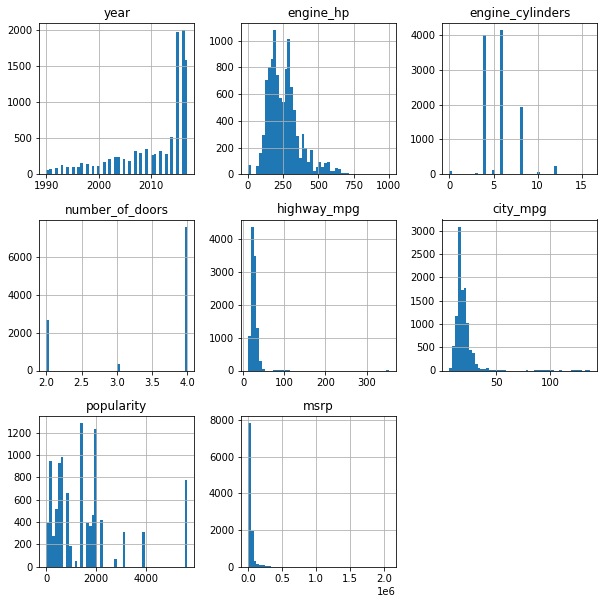

In [52]:
data.hist(bins = 50, figsize = (10,10));

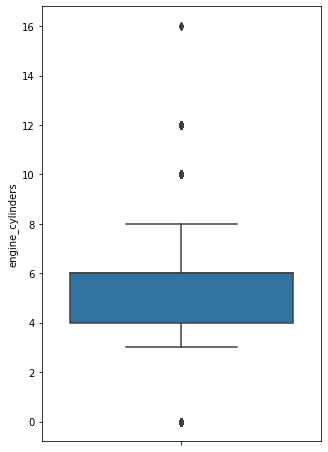

In [53]:
# Engine Cylinders
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'engine_cylinders');

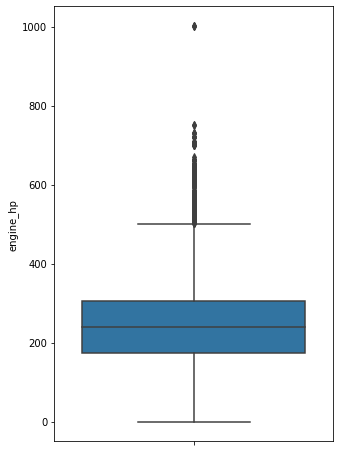

In [54]:
# Engine HP
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'engine_hp');

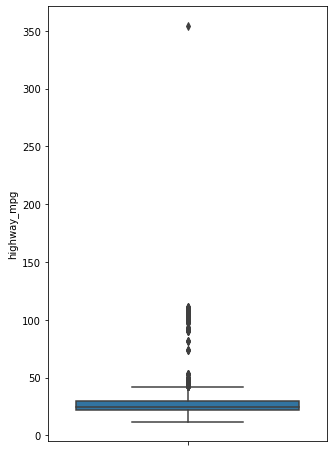

In [55]:
# Highway MPG
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'highway_mpg');

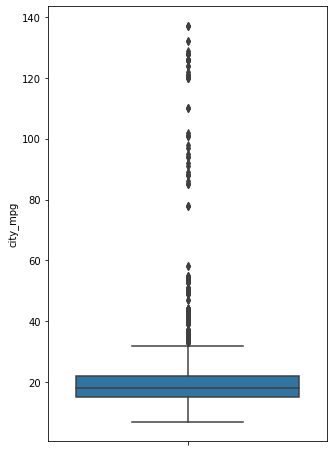

In [56]:
# City mpg
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'city_mpg');

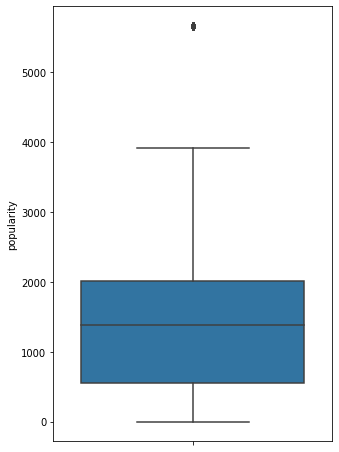

In [57]:
# Popularity

plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'popularity');

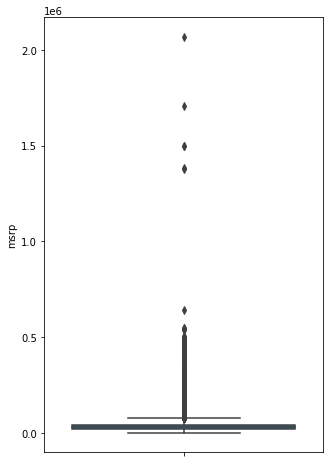

In [58]:
# MSRP
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'msrp');

In [59]:
# Copying data, so we can clean outliers safely.
data_out = data.copy()

In [60]:
# Reference: https://www.kaggle.com/devson/beginnersguidetoeda-prediction
def removingoutliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    
    df_no_outlier = dataframe[(dataframe[column] > min ) & (dataframe[column] < max)]
        
    return df_no_outlier

[[Reference]](#BeginnersGuidetoEDA+Prediction---DEVSON)

In [61]:
# Removing Outlier for MSRP
data_out = removingoutliers(data_out, "msrp")

In [62]:
# Removing Outlier for popularity
data_out = removingoutliers(data_out, "popularity")

In [63]:
# Removing Outlier for city_mpg
data_out = removingoutliers(data_out, "city_mpg")

In [64]:
# Removing Outlier for highway_mpg
data_out = removingoutliers(data_out, "highway_mpg")

In [65]:
# Removing Outlier for engine_hp
data_out = removingoutliers(data_out, "engine_hp")

In [66]:
# Removing Outlier for engine_cylinders
data_out = removingoutliers(data_out, "engine_cylinders")

In [67]:
data_out.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000
mean,2010.507284,235.355505,5.439814,3.540005,26.224266,19.107953,1205.359326,30419.427275
std,7.231041,79.092849,1.395561,0.827690,5.383455,4.119591,876.403787,16159.266772
min,1990.000000,0.000000,3.000000,2.000000,13.000000,10.000000,21.000000,2000.000000
25%,2007.000000,171.000000,4.000000,4.000000,23.000000,16.000000,481.000000,21034.750000
50%,2015.000000,232.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,29900.000000
75%,2016.000000,292.000000,6.000000,4.000000,30.000000,22.000000,1851.000000,40250.000000
max,2017.000000,469.000000,8.000000,4.000000,40.000000,30.000000,3916.000000,76400.000000


_This is looking good._

### Data Visualization

_We already have some knowledge of our data._

_To gain more insights from our it, and check relationships between the features we will use the Data Visualization technique._

In [68]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8374 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               8374 non-null   object 
 1   model              8374 non-null   object 
 2   year               8374 non-null   int64  
 3   engine_fuel_type   8374 non-null   object 
 4   engine_hp          8374 non-null   float64
 5   engine_cylinders   8374 non-null   float64
 6   transmission_type  8374 non-null   object 
 7   driven_wheels      8374 non-null   object 
 8   number_of_doors    8374 non-null   float64
 9   vehicle_size       8374 non-null   object 
 10  vehicle_style      8374 non-null   object 
 11  highway_mpg        8374 non-null   int64  
 12  city_mpg           8374 non-null   int64  
 13  popularity         8374 non-null   int64  
 14  msrp               8374 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.0+ MB


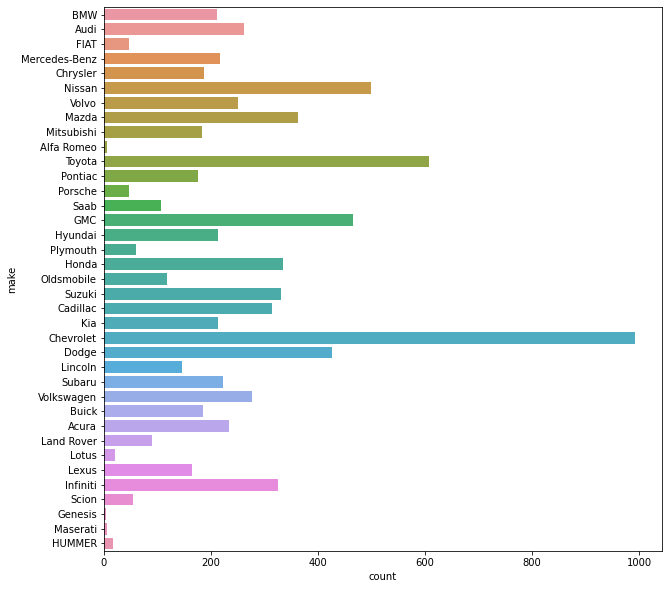

In [69]:
plt.figure(figsize = (10,10))
sns.countplot(data = data_out, y = "make")
plt.show()

- Chevrolet
- Volkswagen
- Toyota
- Nissan

_These cars has largest population, obviously they are widely used brands with average price all over the world. Premium or Luxurious cars are less populated._

- HUMMER
- Maserati
- Alfa Romeo

_Let's observe the same figure with price._

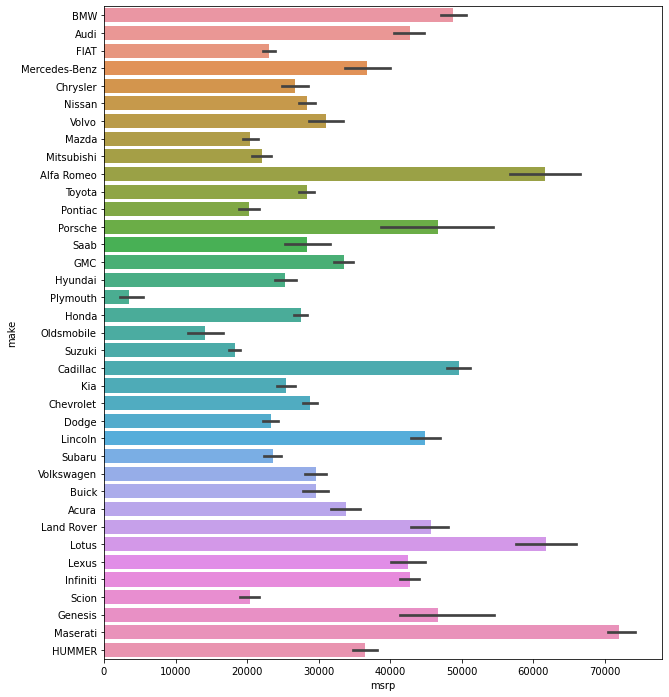

In [70]:
plt.figure(figsize = (10,12))
sns.barplot(data = data_out, y = "make", x = "msrp")
plt.show()

_We can clearly see that `Maserati`, `HUMMER`, `Land Rover` and `Alfa Romeo` are among the expensive cars._

_Let's check the car models._

In [71]:
data_out["model"].value_counts()

Silverado 1500    156
Tundra            118
Sierra 1500        90
Frontier           76
Accord             73
                 ... 
Sixty Special       1
Stanza              1
STS-V               1
Syclone             1
Zephyr              1
Name: model, Length: 688, dtype: int64

_There are 688 unique models. This features is useless for visualization, as single brand consist of multiple models._

_Let's see `engine_fuel_type`._

#### Engine fuel type

In [72]:
data_out['engine_fuel_type'].value_counts()

regular unleaded                                5420
premium unleaded (recommended)                  1107
premium unleaded (required)                     1083
flex-fuel (unleaded/E85)                         642
diesel                                            84
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
flex-fuel (premium unleaded required/E85)          4
natural gas                                        2
Name: engine_fuel_type, dtype: int64

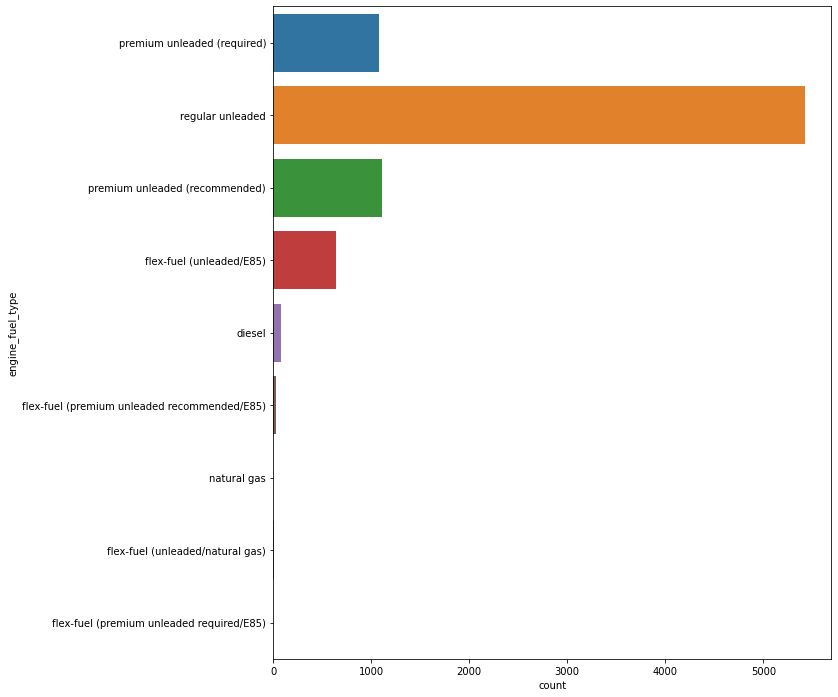

In [73]:
plt.figure(figsize = (10,12))
sns.countplot(y = "engine_fuel_type", data = data_out)
plt.show()

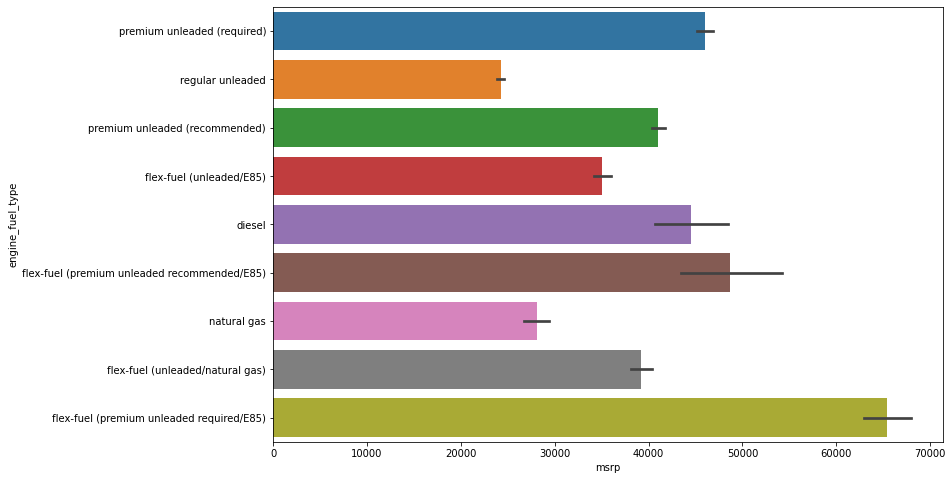

In [74]:
# Engine Type By price:
plt.figure(figsize = (12,8))
sns.barplot(y = "engine_fuel_type", x = "msrp", data = data_out)
plt.show()

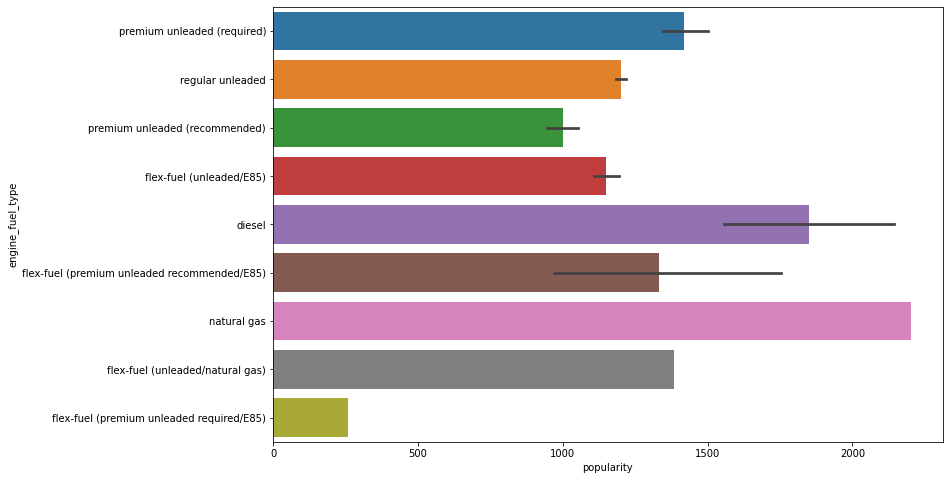

In [75]:
# Engine Type By Popularity:
plt.figure(figsize = (12,8))
sns.barplot(y = "engine_fuel_type", x = "popularity", data = data_out)
plt.show()

#### Engine HP

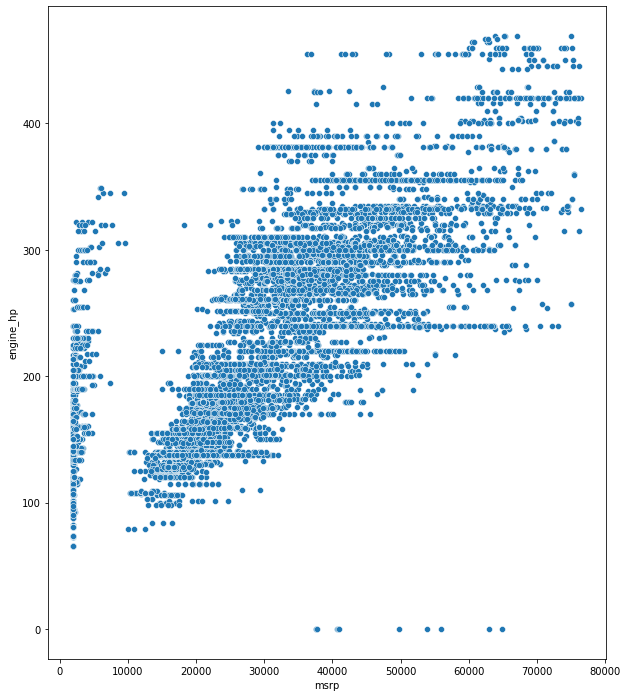

In [76]:
plt.figure(figsize = (10,12))
sns.scatterplot(data = data_out, y = "engine_hp", x = "msrp")
plt.show()

_Let's see if the plot will look better if we rotate it._

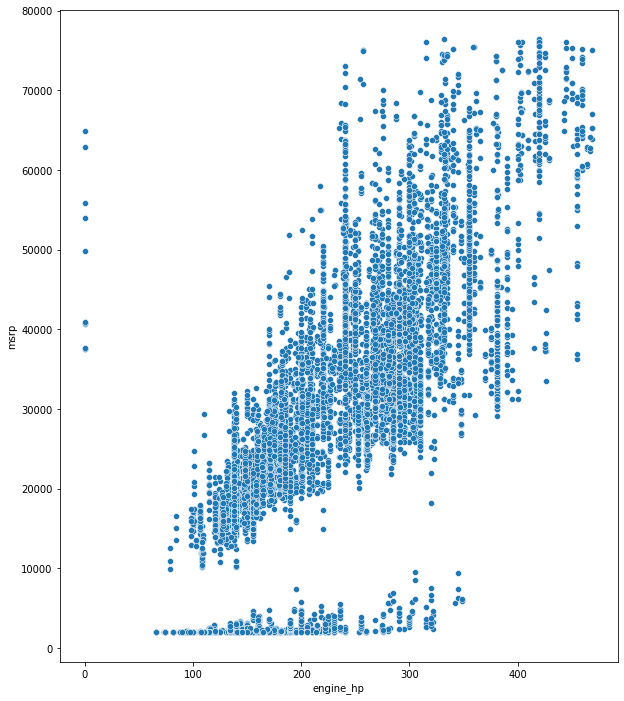

In [77]:
plt.figure(figsize = (10,12))
sns.scatterplot(data = data_out, y = "msrp", x = "engine_hp")
plt.show()

_It does._

_And although this wouldn't be a great model, let's just put a red line through it. This helps us see a bit better that maybe, because of the way that we have plotted this or because our data is not great, the plot seems to have a bit of a funnel shape towards the top._

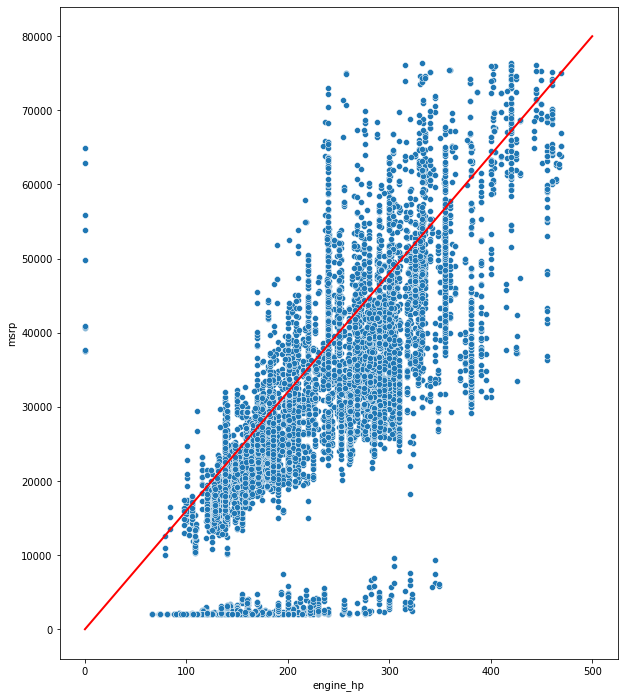

In [78]:
plt.figure(figsize = (10,12))
sns.scatterplot(data = data_out, y = "msrp", x = "engine_hp")
plt.plot([0, 500], [0, 80000], linewidth=2, color='r')
plt.show()

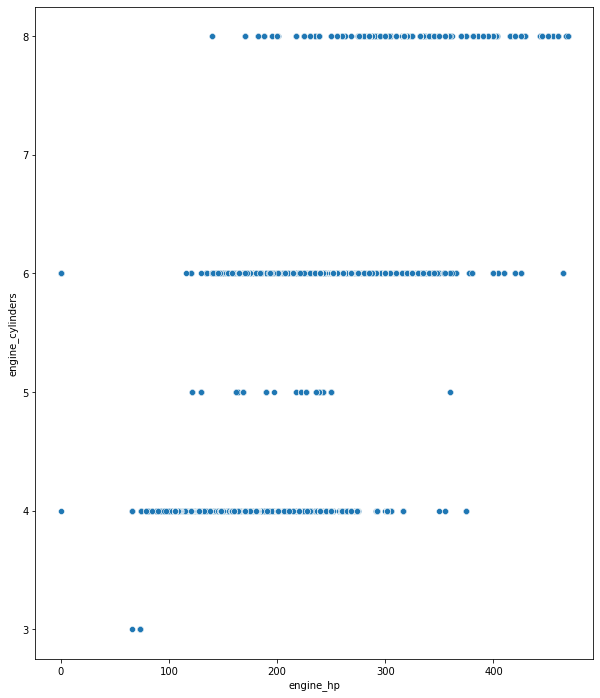

In [79]:
plt.figure(figsize = (10,12))
sns.scatterplot(data = data_out, y = "engine_cylinders", x = "engine_hp")
plt.show()

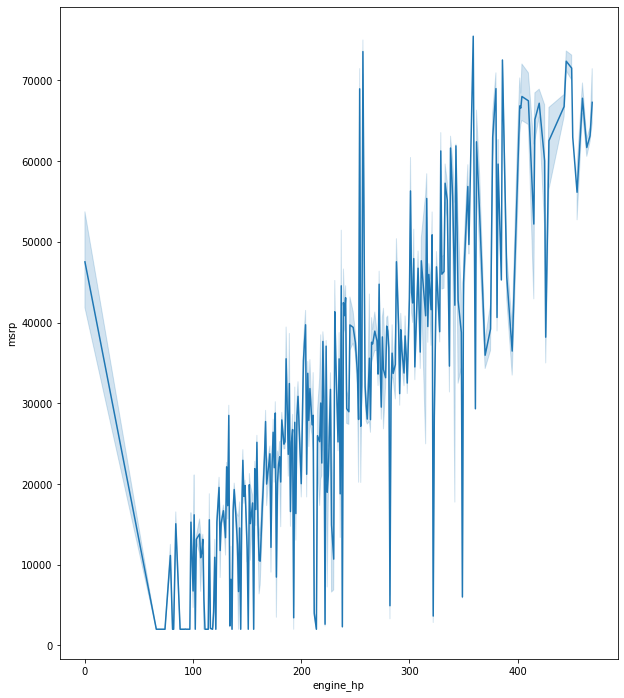

In [80]:
plt.figure(figsize = (10,12))
sns.lineplot(data = data_out, x = "engine_hp", y = "msrp")
plt.show()

_Ignore the 0 HP, it is from Electric Car . The more the HP the more it is expensive._

#### Engine cylinders

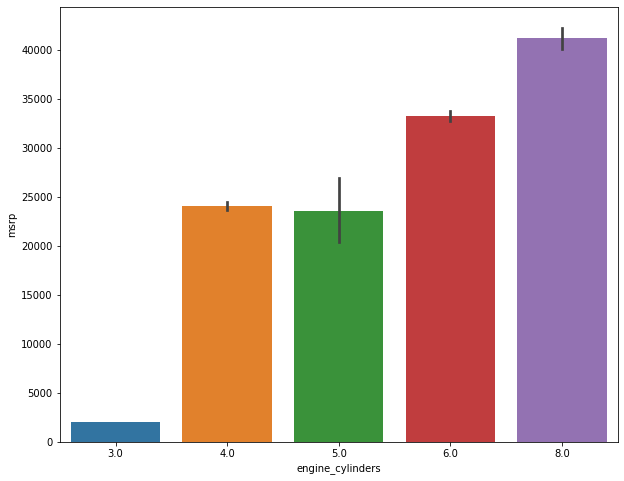

In [81]:
# Checking it by Price:
plt.figure(figsize = (10,8))
sns.barplot( data = data_out, x = 'engine_cylinders', y = 'msrp')
plt.show()

_It's clearly visible that more Engine Cylinders tends to be more expensive._

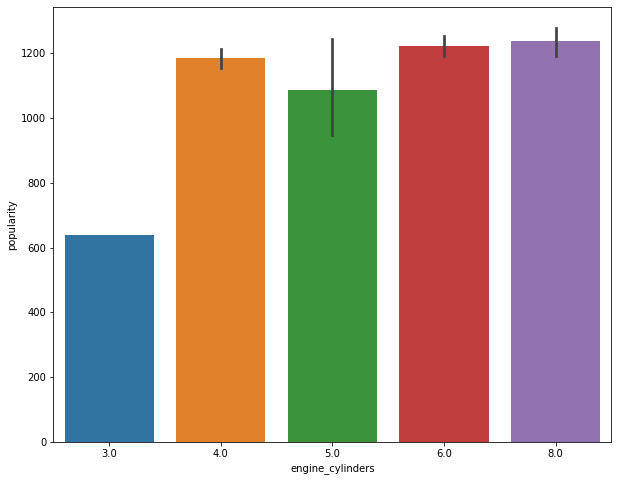

In [82]:
# Checking it by Popularity:
plt.figure(figsize = (10,8))
sns.barplot(data = data_out, x = 'engine_cylinders', y = 'popularity')
plt.show()

#### Transmission type

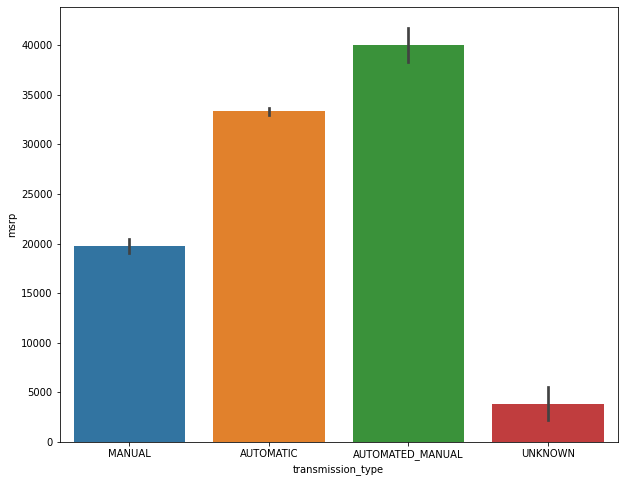

In [83]:
# Checking it by Price:
plt.figure(figsize = (10,8))
sns.barplot(data = data_out, x = 'transmission_type', y = 'msrp')
plt.show()

_We can see that `AUTOMATED_MANUAL` is the more expensive one._

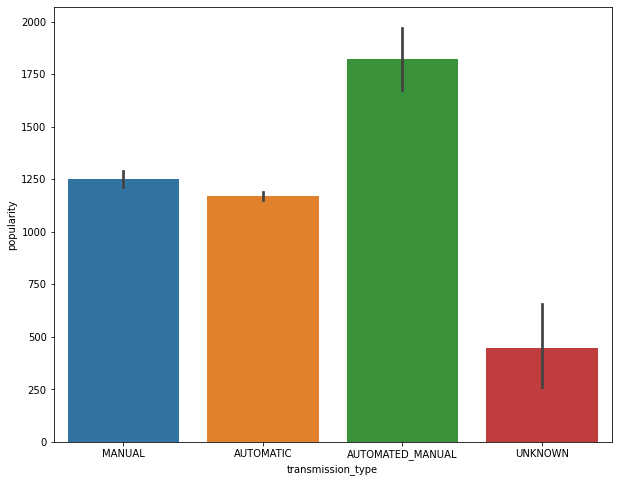

In [84]:
# Checking it by Popularity:
plt.figure(figsize = (10,8))
sns.barplot(data = data_out, x = 'transmission_type', y = 'popularity')
plt.show()

#### Wheel drive

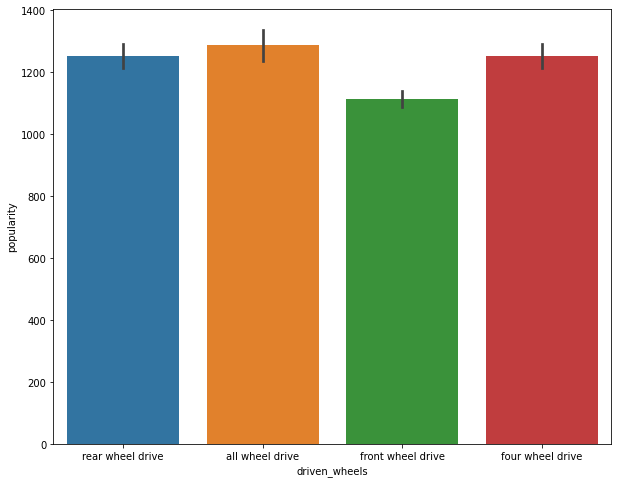

In [85]:
# Checking it by Popularity

plt.figure(figsize = (10,8))
sns.barplot(data = data_out, x = 'driven_wheels', y = 'popularity')
plt.show()

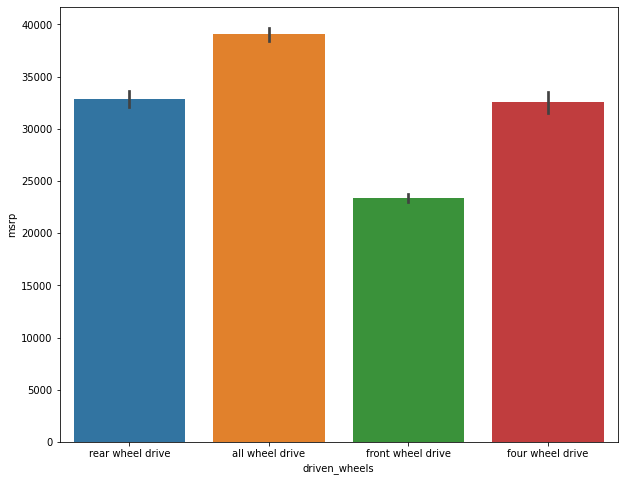

In [86]:
# Checking it by Price

plt.figure(figsize = (10,8))
sns.barplot(data = data_out, x = 'driven_wheels', y = 'msrp')
plt.show()

> Based on research on Google:
>
> - Often sports cars are usually only **rear wheel drive**. This is because all wheel drive adds weight and complexity to the car which does reduce its performance.
> - However, **Four Wheel Drive** and **all wheel drive** are most commonly seen in modern-day **SUV's** and **Pickup Trucks**.
>
> [[Reference]](#BeginnersGuidetoEDA+Prediction---DEVSON)

#### Number of Doors

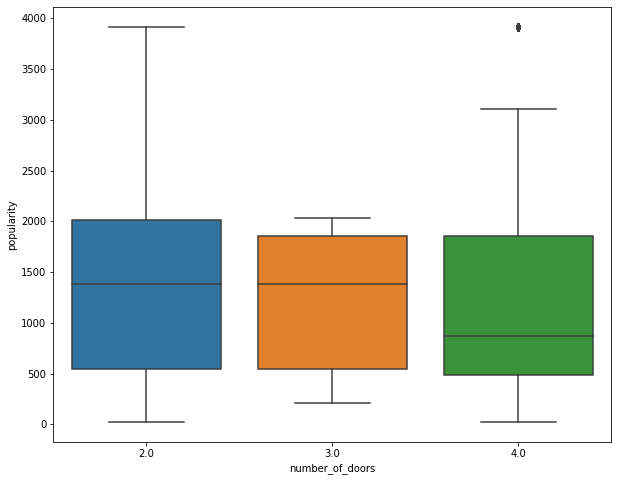

In [87]:
# BY its Popularity

plt.figure(figsize = (10,8))
sns.boxplot(data = data_out, x = 'number_of_doors', y = 'popularity')
plt.show()

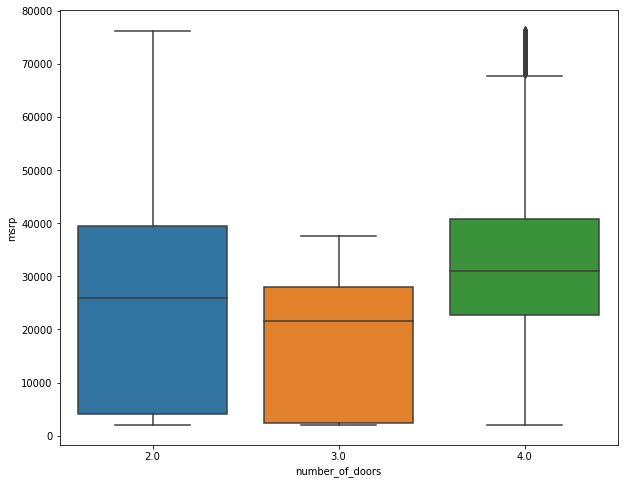

In [88]:
# BY its price

plt.figure(figsize = (10,8))
sns.boxplot(data = data_out, x = 'number_of_doors', y = 'msrp')
plt.show()

_Vehicles with 2 doors are often sports cars which are expensive._

#### Vechicle style

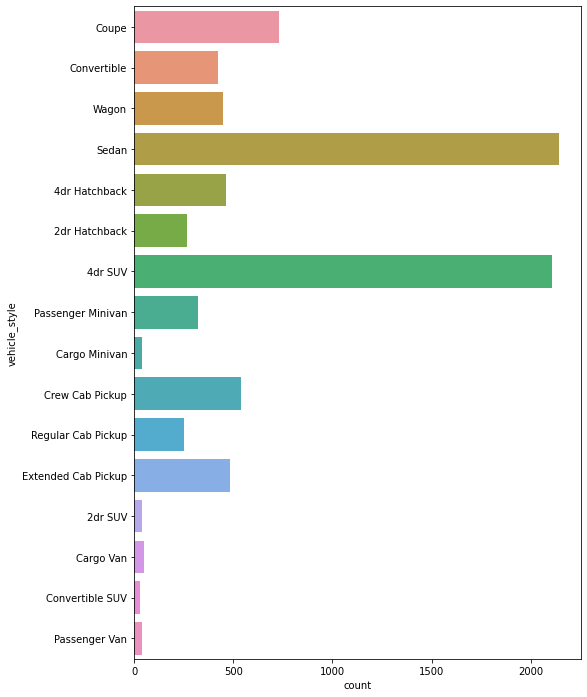

In [89]:
# Plotting the count

plt.figure(figsize = (8,12))
sns.countplot(y = "vehicle_style", data = data_out)
plt.show()

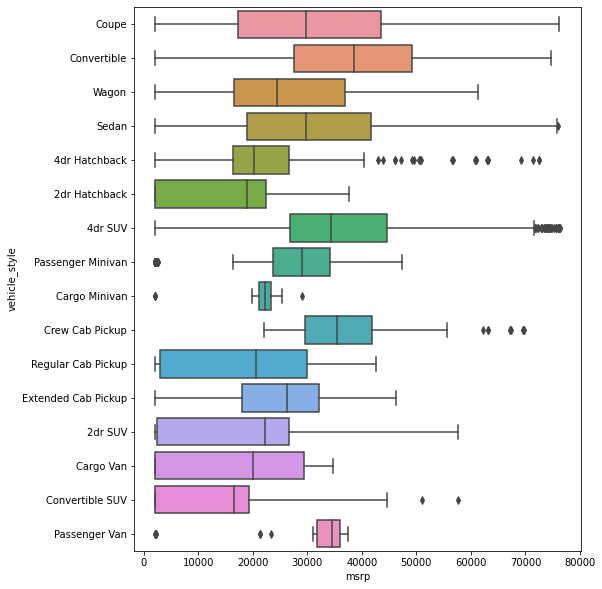

In [90]:
# Comparing it with price.

plt.figure(figsize = (8,10))
sns.boxplot( x= "msrp", y = "vehicle_style", data = data_out)
plt.show()

_Vehicles such as `4 Door SUVs`, `Coupes`, `Convertibles` and `Sedans` have higher prices, so this is true._

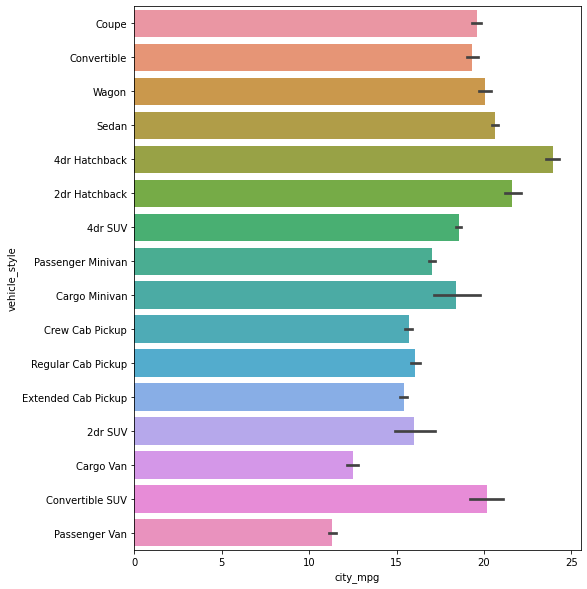

In [91]:
# Vehicle Style vs. City MPG:

plt.figure(figsize = (8,10))
sns.barplot(data = data_out, x= "city_mpg", y = "vehicle_style")
plt.show()

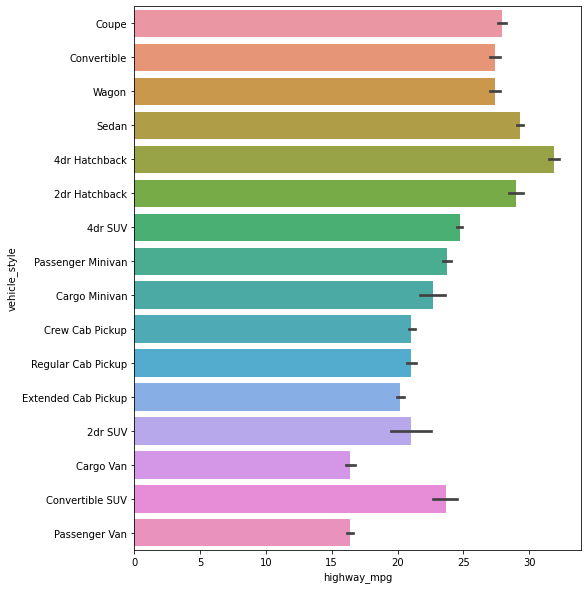

In [92]:
# Vehicle Style vs. City MPG:

plt.figure(figsize = (8,10))
sns.barplot(data = data_out, x= "highway_mpg", y = "vehicle_style")
plt.show()

#### Highway MPG

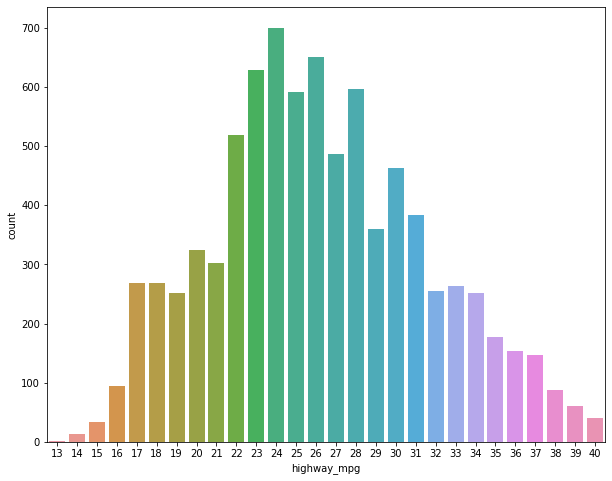

In [93]:
plt.figure(figsize = (10,8))
sns.countplot(x = "highway_mpg", data = data_out)
plt.show()

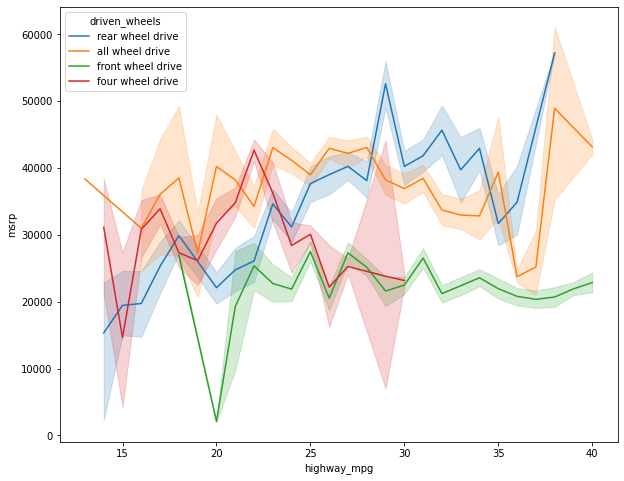

In [94]:
plt.figure(figsize = (10,8))
sns.lineplot(data = data_out, x = "highway_mpg", y = "msrp", hue = "driven_wheels")
plt.show()

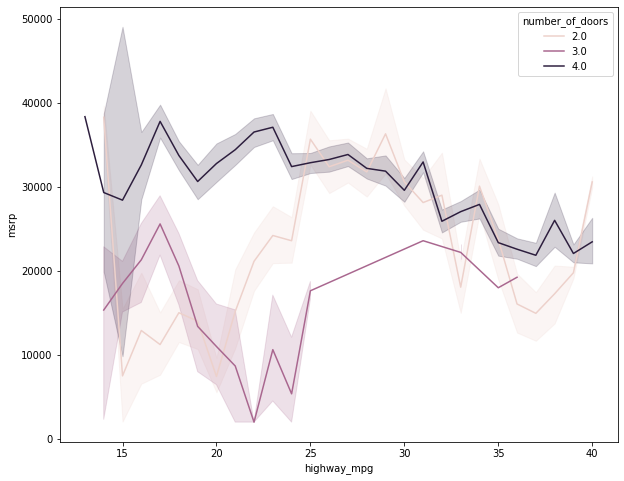

In [95]:
# With number of Doors 

plt.figure(figsize = (10,8))
sns.lineplot(data = data_out, x = "highway_mpg", y = "msrp", hue = "number_of_doors")
plt.show()

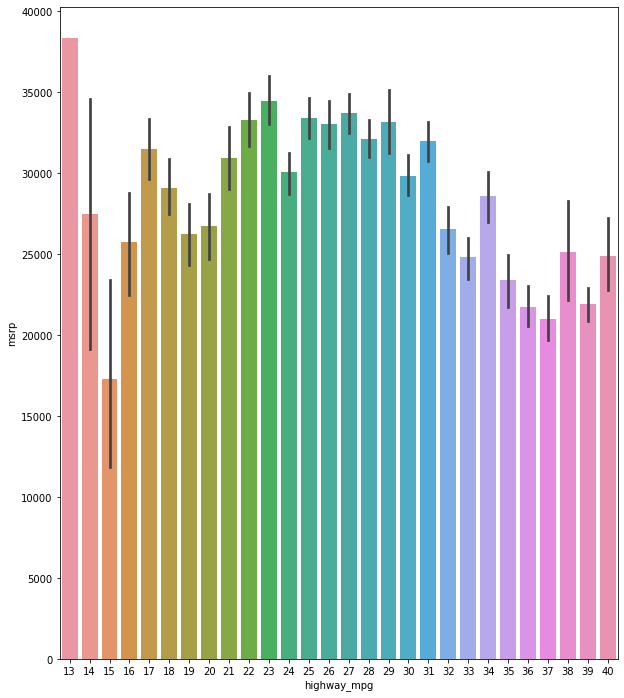

In [96]:
# With the Price

plt.figure(figsize = (10,12))
sns.barplot(data = data_out, x = "highway_mpg", y = "msrp")
plt.show()

> _**Highway MPG** is the average MPG for your car on the highway. Even though you'll be driving faster and often for longer stretches of time, highways are smoother than city roads and keep your engine running at consistent levels, which requires less gas._
> [[Reference]](#BeginnersGuidetoEDA+Prediction---DEVSON)

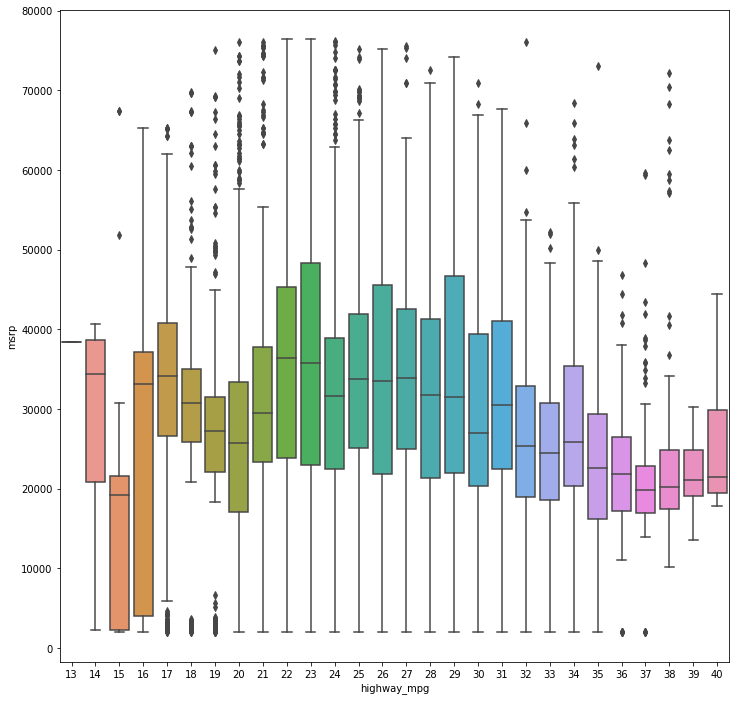

In [97]:
plt.figure(figsize = (12,12))
sns.boxplot(data = data_out, x = "highway_mpg", y = "msrp")
plt.show()

#### City MPG

In [98]:
data_out['city_mpg'].value_counts()

17    1030
18     848
16     827
19     718
15     655
20     646
22     507
21     490
14     379
25     362
23     356
13     338
24     292
27     222
26     193
12     140
28     138
30      85
29      83
11      64
10       1
Name: city_mpg, dtype: int64

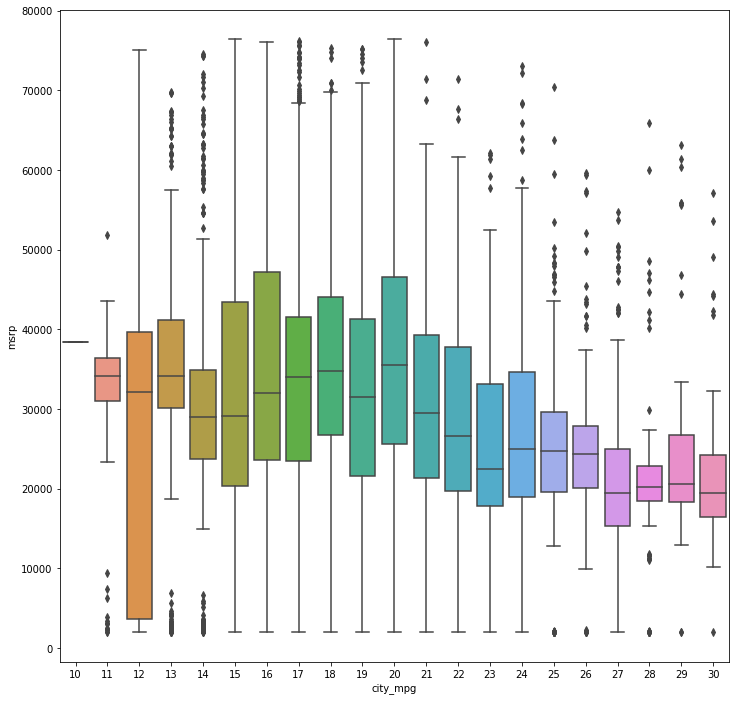

In [99]:
# Let's compare it with price
plt.figure(figsize = (12,12))
sns.boxplot(data = data_out, x = "city_mpg", y = "msrp")
plt.show()

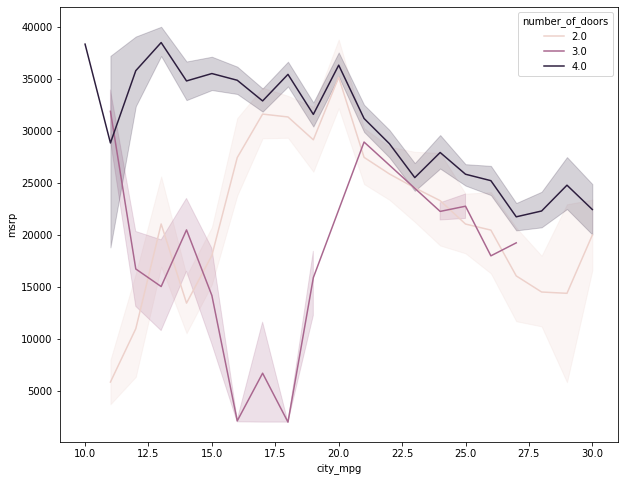

In [100]:
plt.figure(figsize = (10,8))
sns.lineplot(data = data_out, x = "city_mpg", y = "msrp", hue = "number_of_doors")
plt.show()

> MPG depends on the vehicle. For a hybrid car, 19 MPG is bad. For a large pickup truck, 19 MPG is good.
>
> [[Reference]](#BeginnersGuidetoEDA+Prediction---DEVSON)

#### Popularity

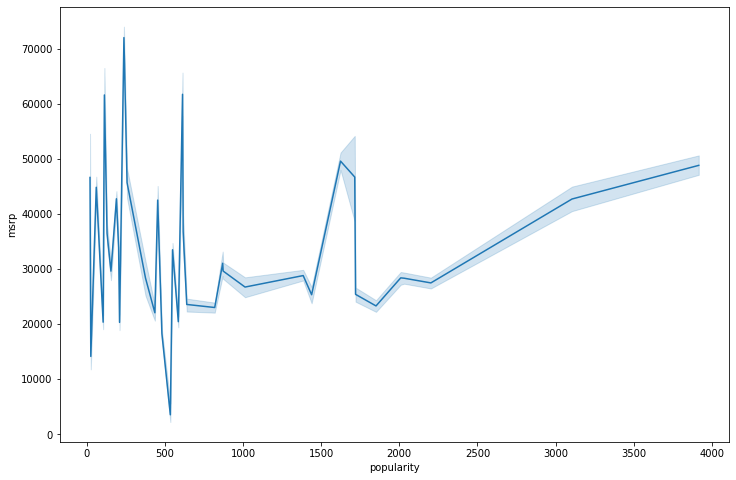

In [101]:
#
plt.figure(figsize = (12,8))
sns.lineplot(x = "popularity", y = "msrp", data = data_out)
plt.show()

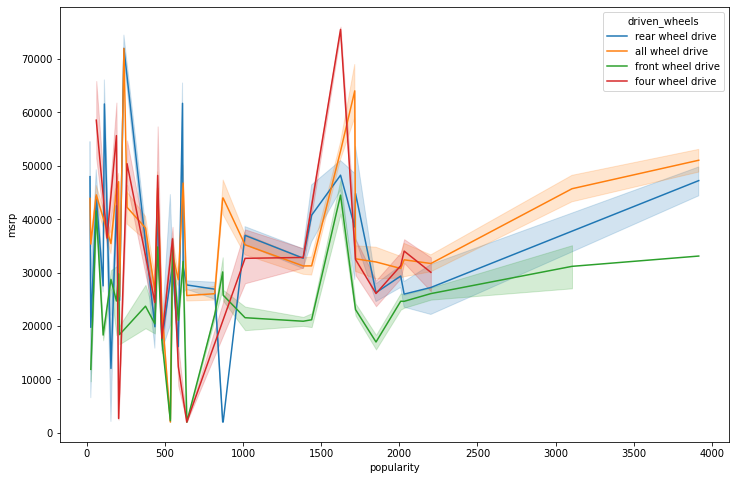

In [102]:
plt.figure(figsize = (12,8))
sns.lineplot(x = "popularity", y = "msrp", data = data_out, hue = "driven_wheels")
plt.show()

_The orange line stands out in comparison to the rest - all wheel drive is the popular one._

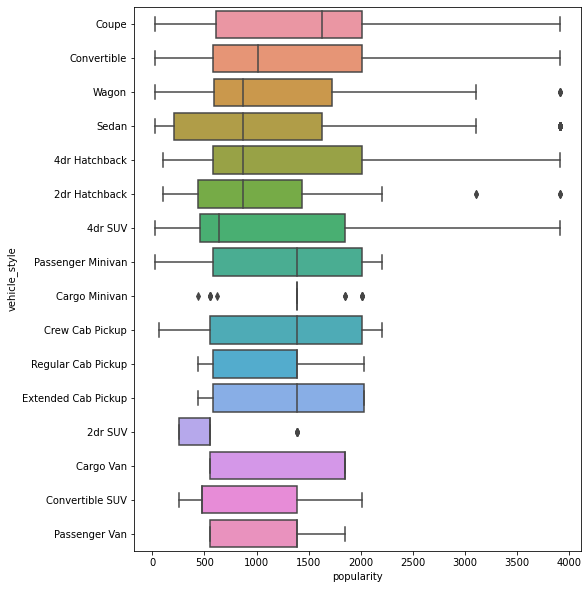

In [103]:
# Which vehicle style is popular

plt.figure(figsize = (8,10))
sns.boxplot( x = "popularity", y = "vehicle_style", data = data_out)
plt.show()

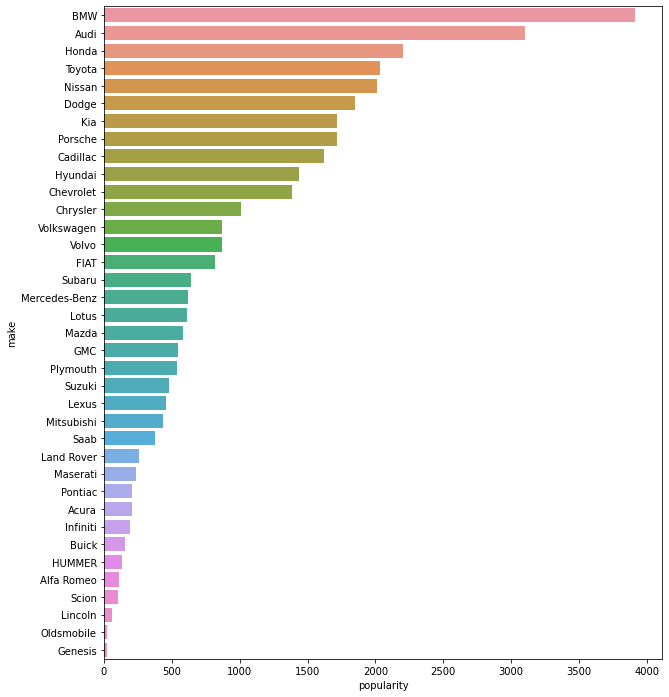

In [104]:
# Let's see by brand:
# plot_order = data_out.groupby('make')['popularity'].sum().sort_values(ascending=False).index.values
plot_order = data_out.groupby(["make"])['popularity'].aggregate(np.median).reset_index().sort_values('popularity', ascending=False)

plt.figure(figsize = (10,12))
sns.barplot(data = data_out, y = "make", x = "popularity", order=plot_order['make'], ci=None)
# sns.barplot(data = data_out, y = "make", x = "popularity", order=plot_order[1:], ci=None)
# sns.barplot(data = data_out, y = "make", x = "popularity", ci=None)
plt.show()

_`BMW`, `Audi`, `Honda`, `Toyota`, `Nissan`, `Dodge`, these are the top popular brands._

#### Year

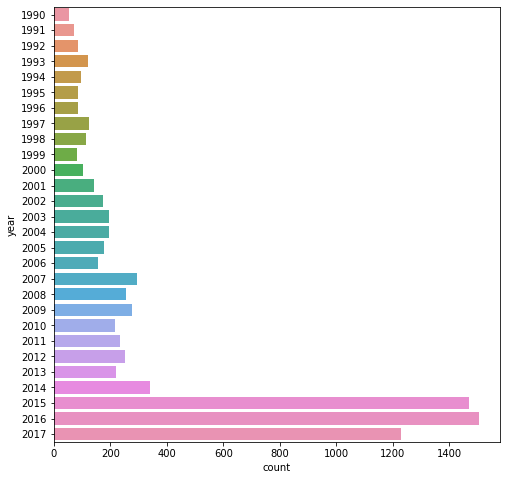

In [105]:
plt.figure(figsize = (8,8))
sns.countplot(y = "year", data = data_out)
plt.show()

_The years `2015` , `2016` are the most popular ones._

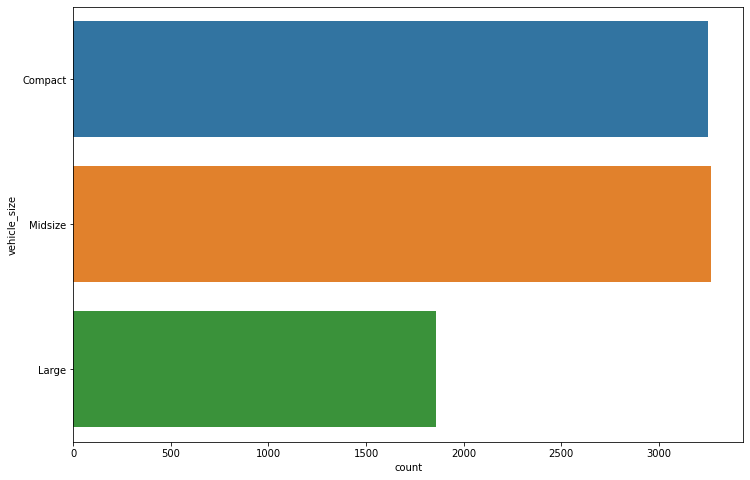

In [106]:
# Let's check it with the price

plt.figure(figsize = (12,8))
sns.countplot(y = "vehicle_size", data = data_out)
plt.show()

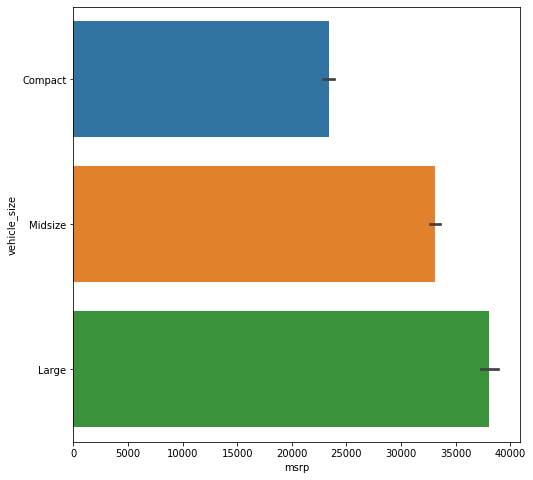

In [107]:
# With respect to price

plt.figure(figsize = (8,8))
sns.barplot(y = "vehicle_size", x = "msrp", data = data_out)
plt.show()

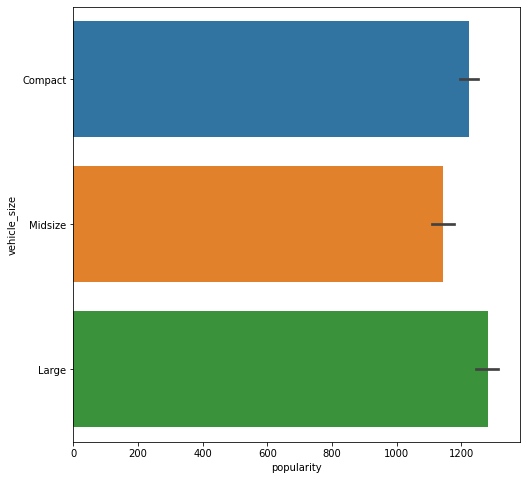

In [108]:
# With respect to popularity

plt.figure(figsize = (8,8))
sns.barplot(y = "vehicle_size", x = "popularity", data = data_out)
plt.show()

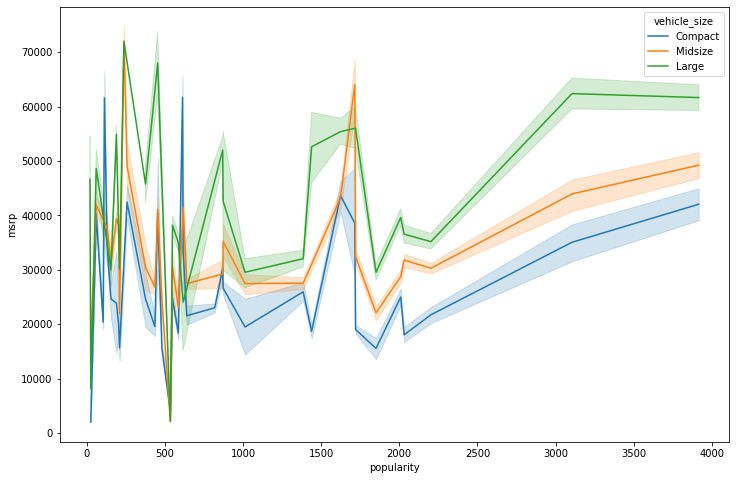

In [109]:
plt.figure(figsize = (12,8))
sns.lineplot(x = "popularity", y = "msrp", data = data_out, hue = "vehicle_size")
plt.show()

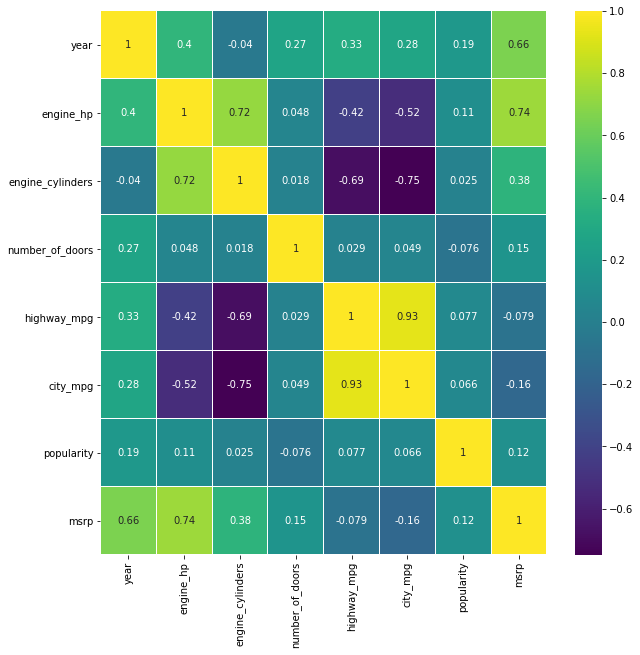

In [110]:
# Let's see the correleation of all the features

corr = data_out.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'viridis', annot = True, linewidth = 0.1)
plt.show()

_Observation:_

- _`MSRP` is the dependent variable._

- _The variables `engine_hp` and `year` have the highest correlation with the dependent variable._

- _Multicollinearity exits in our data set. Observe the correlation between `engine_hp` & `engine_cylinders` and `highway_mpg` & `city_mpg`._

In [111]:
year_corr, _ = pearsonr(data_out['year'], data_out['msrp'])
print('Pearsons correlation betweeen year and msrp: %.3f' % year_corr)

Pearsons correlation betweeen year and msrp: 0.658


In [112]:
engine_hp_corr, _ = pearsonr(data_out['engine_hp'], data_out['msrp'])
print('Pearsons correlation betweeen engine_hp and msrp: %.3f' % engine_hp_corr)

Pearsons correlation betweeen engine_hp and msrp: 0.744


In [113]:
engine_cylinders_corr, _ = pearsonr(data_out['engine_hp'], data_out['engine_cylinders'])
print('Pearsons correlation betweeen engine_hp and engine_cylinders: %.3f' % engine_cylinders_corr)

Pearsons correlation betweeen engine_hp and engine_cylinders: 0.723


In [114]:
mpg_corr, _ = pearsonr(data_out['highway_mpg'], data_out['city_mpg'])
print('Pearsons correlation betweeen highway_mpg and city_mpg: %.3f' % mpg_corr)

Pearsons correlation betweeen highway_mpg and city_mpg: 0.931


---

## Prepare the Dataset

In [115]:
data_prep = data_out.copy()

### Encoding Categorical Variables

> Our dataset consists of categorical features, before splitting the dataset we have to encode the datset. Since our dataset, doesn't consist of any Ordinal Data we do not have any order of sequence.
>
> We will be using One Hot Encoding.
>
> Read this article to know more about Encoding: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
>
> [[Reference]](#BeginnersGuidetoEDA+Prediction---DEVSON)

In [116]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8374 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               8374 non-null   object 
 1   model              8374 non-null   object 
 2   year               8374 non-null   int64  
 3   engine_fuel_type   8374 non-null   object 
 4   engine_hp          8374 non-null   float64
 5   engine_cylinders   8374 non-null   float64
 6   transmission_type  8374 non-null   object 
 7   driven_wheels      8374 non-null   object 
 8   number_of_doors    8374 non-null   float64
 9   vehicle_size       8374 non-null   object 
 10  vehicle_style      8374 non-null   object 
 11  highway_mpg        8374 non-null   int64  
 12  city_mpg           8374 non-null   int64  
 13  popularity         8374 non-null   int64  
 14  msrp               8374 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ MB


In [117]:
car_features = ["make","model","engine_fuel_type","transmission_type","driven_wheels","vehicle_size","vehicle_style"]

_Initially I got the error below, and I thought it had something to do with the attributes not being encoded as categories._

In [118]:
#  data_prep = pd.get_dummies(data_prep, columns = car_features)

# Got the following error:

### ---------------------------------------------------------------------------
### AttributeError                            Traceback (most recent call last)
### <ipython-input-226-fbbf5455cff2> in <module>
### ----> 1 data_prep = pd.get_dummies(data_prep)
### 
### AttributeError: 'function' object has no attribute 'get_dummies'

_I researched it and I thought I have to encode the columns to labels as according to [this](#Dask-get_dummies-Does-Not-Transform-Variable(s))._

> Label Encoding

> Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

In [119]:
# performing label encoding to the categorical columns
columns_to_convert=["make","model","engine_fuel_type","transmission_type","driven_wheels","vehicle_size","vehicle_style"]

data_prep[columns_to_convert] = data_prep[columns_to_convert].astype('category')

In [120]:
data_prep.dtypes

make                 category
model                category
year                    int64
engine_fuel_type     category
engine_hp             float64
engine_cylinders      float64
transmission_type    category
driven_wheels        category
number_of_doors       float64
vehicle_size         category
vehicle_style        category
highway_mpg             int64
city_mpg                int64
popularity              int64
msrp                    int64
dtype: object

In [121]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8374 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   make               8374 non-null   category
 1   model              8374 non-null   category
 2   year               8374 non-null   int64   
 3   engine_fuel_type   8374 non-null   category
 4   engine_hp          8374 non-null   float64 
 5   engine_cylinders   8374 non-null   float64 
 6   transmission_type  8374 non-null   category
 7   driven_wheels      8374 non-null   category
 8   number_of_doors    8374 non-null   float64 
 9   vehicle_size       8374 non-null   category
 10  vehicle_style      8374 non-null   category
 11  highway_mpg        8374 non-null   int64   
 12  city_mpg           8374 non-null   int64   
 13  popularity         8374 non-null   int64   
 14  msrp               8374 non-null   int64   
dtypes: category(7), float64(3), int64(5)
memory usage: 936

In [122]:
data_prep.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [123]:
data_prep.shape

(8374, 15)

_I tried it again after encoding the labels as categories and I got the same error again._

In [124]:
# data_prep = pd.get_dummies(data_prep)

# Got the following error:

### ---------------------------------------------------------------------------
### AttributeError                            Traceback (most recent call last)
### <ipython-input-226-fbbf5455cff2> in <module>
### ----> 1 data_prep = pd.get_dummies(data_prep)
### 
### AttributeError: 'function' object has no attribute 'get_dummies'

_I tried researching the problem, but I found nothing that would point me in the right direction:_

- [Is-Pandas-not-importing?-'NameError:-global-name-'pandas'-is-not-defined'](Is-Pandas-not-importing?-'NameError:-global-name-'pandas'-is-not-defined')
- [Python-Pandas:-NameError:-name-is-not-defined](#Python-Pandas:-NameError:-name-is-not-defined)
- [module-'pandas'-has-no-attribute-'read_csv](#module-'pandas'-has-no-attribute-'read_csv)
- [AttributeError:-module-'pandas'-has-no-attribute-'read_csv'-Python3.5](#AttributeError:-module-'pandas'-has-no-attribute-'read_csv'-Python3.5)

_Then I lost a good chunk of my precious, limited time messing about with my computer, trying to find if anything is wrong, such as `PATH` values etc. risking to do even more harm._

_And when that gave no results I continued to try and think what else can I methodically rule out or temporary remove or switch on/off and like that I found that for some mysterious reason the following imports below gave me the problems I was having. I had copy/pasted those imports from a previous project and I did not currently need them, so I removed them._

In [125]:
### For some reason the below imports are causing a problem with pandas:
# from turtle import *
# from sympy.ntheory import discrete_log
# from matplotlib.transforms import Affine2D

In [126]:
data_dumb = pd.get_dummies(data_prep, columns = car_features)

In [127]:
data_dumb.dtypes

year                                  int64
engine_hp                           float64
engine_cylinders                    float64
number_of_doors                     float64
highway_mpg                           int64
                                     ...   
vehicle_style_Passenger Minivan       uint8
vehicle_style_Passenger Van           uint8
vehicle_style_Regular Cab Pickup      uint8
vehicle_style_Sedan                   uint8
vehicle_style_Wagon                   uint8
Length: 769, dtype: object

In [128]:
data_dumb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8374 entries, 0 to 11913
Columns: 769 entries, year to vehicle_style_Wagon
dtypes: float64(3), int64(5), uint8(761)
memory usage: 6.9 MB


In [129]:
data_dumb.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_Acura,make_Alfa Romeo,...,vehicle_style_Convertible,vehicle_style_Convertible SUV,vehicle_style_Coupe,vehicle_style_Crew Cab Pickup,vehicle_style_Extended Cab Pickup,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0


In [130]:
data_dumb.shape

(8374, 769)

### Decoupling target

In [131]:
# Splitting the dependent and independent variables

x_orig = data_dumb.drop(["msrp"], axis = 1)
y_orig = data_dumb["msrp"]
x = x_orig.values
y = y_orig.values

In [132]:
print(x.shape)
print(y.shape)

(8374, 768)
(8374,)


_Initially I tried normalizing (scaling) the date before splitting it. Please see the commented out lines of code below._

_This however gave me testing accuracies for Linear Regression which were suspiciously high._

_They were around $95.6782\%$ which was higher than the testing accuracy of SVR._

_This made me suspicious that the models were overfitting._

_This is also probably to do with the data set being small as well._

_Because of this I decided to first split the data and then normalize it._

In [133]:
### Scaling the Dataset

# Normalizing the data.

# sc = StandardScaler()
# sc_x = StandardScaler()
# sc_y = StandardScaler()

# x = sc_x.fit_transform(x)
# y = sc_y.fit_transform(y.reshape(-1,1))

In [134]:
### Splitting the Dataset into train and test portions

# x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

### Splitting the Dataset

> Typically,we separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. Analysis Services randomly samples the data to help ensure that the testing and training sets are similar.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

_I tried playing around with a few parameters, in order to tune them as fine as possible for the data set, as it seems it might be rather small for Machine Learning, or rather for accurate ML._

_Please see the commented out lines of code below for reference._

In [135]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [136]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [138]:
x_train_bef_scale = x_train.copy()
x_test_bef_scale = x_test.copy()
y_train_bef_scale = y_train.copy()
y_test_bef_scale = y_test.copy()

In [139]:
def print_shape_x_y_train_test(x_train, x_test, y_train, y_test):
    print("x_train shape:", x_train.shape)
    print("x_test shape", x_test.shape)
    print("y_train shape", y_train.shape)
    print("y_test shape", y_test.shape)
    
print_shape_x_y_train_test(x_train, x_test, y_train, y_test)    

x_train shape: (6699, 768)
x_test shape (1675, 768)
y_train shape (6699,)
y_test shape (1675,)


### Scaling the Dataset

In [140]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train.reshape(-1,1))
y_test = sc.fit_transform(y_test.reshape(-1,1))

In [141]:
print_shape_x_y_train_test(x_train, x_test, y_train, y_test)

x_train shape: (6699, 768)
x_test shape (1675, 768)
y_train shape (6699, 1)
y_test shape (1675, 1)


---

## Modeling and Testing

### Predictive Modeling

> Predictive modeling is a powerful way to add intelligence to your application. It enables applications to predict outcomes against new data. The act of incorporating predictive analytics into your applications involves two major phases: model training and model deployment.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

---

### Linear Regression

_From our EDA so far I think that we have a **regression** task on our hands, rather than a **classification** one._

_First, let's start our dive in ML with one of the simpler ML algorithms - **Linear Regression**._

_Let's see how **Linear Regression** performs and this should give us a good indication if it is good enough, or if we need a more complex algorithm._

> Linear regression is a basic and commonly used type of predictive analysis.The overall idea of regression is to examine two things:
>
> (1) Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
>
> (2) Which variables in particular are significant predictors of the outcome variable, and in what way, indicated by the magnitude and sign of the beta estimates, do they impact the outcome variable?
>
> These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

_Let's use the following hyperparameters for the Linear regression:_

- `fit_intercept=True` - to calculate the intercept for this model.

- `normalize=False` - this parameter is ignored when ``fit_intercept`` is set to False. If True, the regressors X will be normalized before regression, but because we have scaled and standardized the data, using :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``, we need to use the estimator with ``normalize=False``.

In [142]:
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(x_train, y_train)

# Calculating the accuracies.
print("Training Accuracy:", lr_model.score(x_train,y_train))
print("Testing Accuracy:", lr_model.score(x_test,y_test))

Training Accuracy: 0.9607258757681244
Testing Accuracy: -1.3747372982331965e+24


_The training accuracy seems suspiciously high, and the testing accuracy is very low._

_The model seems to be overfitting on the training data and performing poorly on the testing data._

_**Testing Accuracy:** $-1.374737×10^24$ **a.k.a.** $-1374737000000000000000000$_

In [143]:
lr_y_pred = lr_model.predict(x_test)
lr_y_pred[0:5]

array([[-2.08031773e+11],
       [-4.23426553e+11],
       [-9.35965546e+10],
       [-8.11343432e+11],
       [ 6.43225778e+11]])

In [144]:
print_shape_x_y_train_test(x_train, x_test, y_train, y_test)    

x_train shape: (6699, 768)
x_test shape (1675, 768)
y_train shape (6699, 1)
y_test shape (1675, 1)


In [145]:
lr_y_pred.shape

(1675, 1)

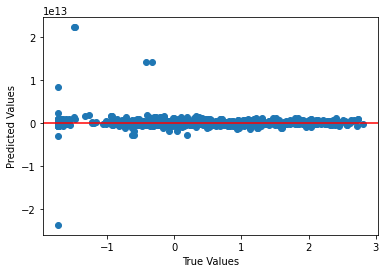

In [146]:
def scatter_plot_y_test_pred(y_test, lr_y_pred, plot_h_line):
    plt.scatter(y_test, lr_y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    if(plot_h_line == True):
        plt.axhline(y=0, color='r')
    plt.show()
    
scatter_plot_y_test_pred(y_test, lr_y_pred, True)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


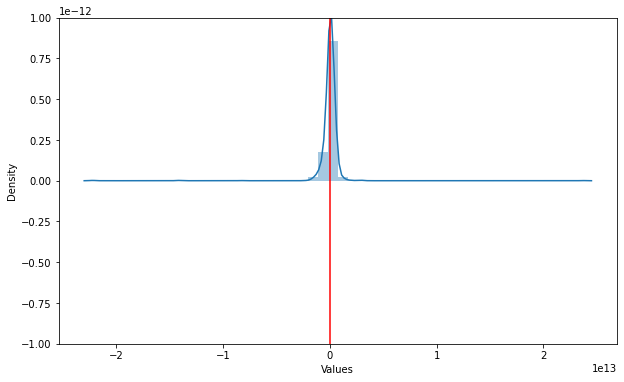

In [147]:
def plot_distribution(y_test, y_pred, bins_to_show, plot_v_line):
    plt.figure(figsize = (10,6))
    sns.distplot((y_test - y_pred), bins=bins_to_show)
    plt.xlabel("Values")
    plt.ylabel("Density")
    if(plot_v_line == True):
        plt.axvline(x=0, color='r', label='axvline - full height')
    plt.show()
    
plot_distribution(y_test, lr_y_pred, 50, True)

**Why is intercept important?**

> Let's assume an ordinary least squares regression. In this case, the slope of the fitted line is equal to the correlation between y and x corrected by the ratio of standard deviations of these variables. The intercept of the fitted line is such that the line passes through the center of mass (x, y) of the data points.
>
> [[Reference]](#Wikipedia---Simple-linear-regression)

> There is a misconception among analysts that it can be removed in order to make the model significant, leading to higher R2 and F-ratio. However, a regression without a constant means that the regression line goes through the origin wherein the dependent variable and the independent variable is equal to zero. In the figure shown, the dashed line is the regular regression line without removing the intercept. The line in bold is the one which has its intercept removed. This means that by removing the intercept we are actually forcing the line to run through the origin.
>
> <img src="./images/I3.png" width="720"/>
>
> [[Reference]](#WHY-IS-INTERCEPT-IMPORTANT-IN-REGRESSION-ANALYSIS?)

> Intercept: The y-intercept is wherever the regression curve y=mx+b crosses the y axis (where x=0), and is denoted by b.
>
> The formula to calculate intercept is $b = y - mx$
>
> When slope and intercept are going to be placed into the formula y=mx+b, then you may get the description of the best-fit line.
>
> <img src="./images/topcoder linear regression 1.png" width="640"/>
>
>[[Reference]](#Topcoder---INTRODUCTION-TO-LINEAR-REGRESSION)

In [148]:
# Retrieving the intercept:
print(lr_model.intercept_)

[0.00096812]


> Interpreting Regression Coefficients for Linear Relationships
The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
>
>The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.
>
>The coefficients in your statistical output are estimates of the actual population parameters. To obtain unbiased coefficient estimates that have the minimum variance, and to be able to trust the p-values, your model must satisfy the seven classical assumptions of OLS linear regression.
>
>Statisticians consider regression coefficients to be an unstandardized effect size because they indicate the strength of the relationship between variables using values that retain the natural units of the dependent variable. Effect sizes help you understand how important the findings are in a practical sense. To learn more about unstandardized and standardized effect sizes, read my post about Effect Sizes in Statistics.
>
> [[Reference]](#How-to-Interpret-P-values-and-Coefficients-in-Regression-Analysis)


> Ordinary least squares, or linear least squares, estimates the parameters in a regression model by minimizing the sum of the squared residuals. This method draws a line through the data points that minimizes the sum of the squared differences between the observed values and the corresponding fitted values.
>
> <img src="./images/residuals-300x186.png" width="300"/>
>
> [[Reference]](#Ordinary-least-squares-[OLS])

In [149]:
# Retrieving the slope:
print(lr_model.coef_)

[[ 3.69124658e-01  2.80161499e-01  2.51834949e-02  6.58522965e-02
  -6.92963027e-02  6.47459088e-02 -2.16466923e+11 -3.24803314e+11
   1.80067555e+11 -8.77228781e+10  2.57851258e+11  1.72131296e+11
  -3.28754578e+11  2.28106838e+11 -1.53812974e+11 -1.85299097e+11
   7.87722824e+11  1.13917672e+11  9.09246220e+11  1.63350404e+11
  -8.16828427e+10  1.04214770e+11  1.32956553e+11  1.60976958e+11
   1.76668396e+11 -1.38041420e+11  1.13089879e+11 -2.27286893e+11
   2.81424898e+11  9.38807091e+09  1.33685082e+11  3.46293194e+11
   9.57261674e+10  2.69359782e+11 -9.35097685e+10  3.73997091e+11
   1.78698630e+11  1.22343575e+10  8.20880742e+10 -1.69634449e+11
   1.08125585e+11 -3.19634122e+11 -1.96408225e+11 -1.82937133e+11
  -4.72770319e+10 -1.26475979e+10  2.69156861e+10 -2.00616681e+11
  -2.90670258e+10 -1.00825348e+10 -4.55606951e+10  5.02981801e+10
  -3.56657856e+09  1.90365291e+10 -9.43205250e+09 -1.84964816e+10
  -5.78719790e+10 -2.82724429e+10  5.14779739e+10 -6.61789659e+10
  -7.31406

_Let's check some metrics._

> $R^2$ is a statistic that will give some information about the goodness of fit of a model. In regression, the $R^2$ coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An $R^2$ of 1 indicates that the regression predictions perfectly fit the data.
>
> [[Reference]](#Wikipedia---Coefficient-of-determination)

> R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.
>
> Image of a large R-squared.After fitting a linear regression model, you need to determine how well the model fits the data. Does it do a good job of explaining changes in the dependent variable?
>
> [[Reference]](#How-To-Interpret-R-squared-in-Regression-Analysis)

_For more definitions of the remaining metrics, please see the [Definitions](#Definitions) section._

In [150]:
def print_metrics(y_test, y_pred):
    print("R2 Score: ", r2_score(y_test,y_pred))
    print("MSE: ", mean_squared_error(y_test,y_pred))
    print("MAE: ", mean_absolute_error(y_test,y_pred))
    print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))

print_metrics(y_test, lr_y_pred)

R2 Score:  -1.3747372982331965e+24
MSE:  1.3747372982331965e+24
MAE:  330595808222.07654
RMSE:  1172491918195.2583


In [151]:
### Test
# The code below is commented out as it is for display/demo only, otherwise it breaks the notebook.
# print_metrics(0, 0)

_This failed with the following error:_

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-253-2b6b433e2a31> in <module>
----> 1 print_metrics(0, 0)

<ipython-input-150-3451226b5deb> in print_metrics(y_test, y_pred)
      1 def print_metrics(y_test, y_pred):
----> 2     print("R2 Score: ", r2_score(y_test,y_pred))
      3     print("MSE: ", mean_squared_error(y_test,y_pred))
      4     print("MAE: ", mean_absolute_error(y_test,y_pred))
      5     print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py in inner_f(*args, **kwargs)
     61             extra_args = len(args) - len(all_args)
     62             if extra_args <= 0:
---> 63                 return f(*args, **kwargs)
     64 
     65             # extra_args > 0

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py in r2_score(y_true, y_pred, sample_weight, multioutput)
    674     -3.0
    675     """
--> 676     y_type, y_true, y_pred, multioutput = _check_reg_targets(
    677         y_true, y_pred, multioutput)
    678     check_consistent_length(y_true, y_pred, sample_weight)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py in _check_reg_targets(y_true, y_pred, multioutput, dtype)
     86         the dtype argument passed to check_array.
     87     """
---> 88     check_consistent_length(y_true, y_pred)
     89     y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
     90     y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py in check_consistent_length(*arrays)
    257     """
    258 
--> 259     lengths = [_num_samples(X) for X in arrays if X is not None]
    260     uniques = np.unique(lengths)
    261     if len(uniques) > 1:

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py in <listcomp>(.0)
    257     """
    258 
--> 259     lengths = [_num_samples(X) for X in arrays if X is not None]
    260     uniques = np.unique(lengths)
    261     if len(uniques) > 1:

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py in _num_samples(x)
    196             x = np.asarray(x)
    197         else:
--> 198             raise TypeError(message)
    199 
    200     if hasattr(x, 'shape') and x.shape is not None:

TypeError: Expected sequence or array-like, got <class 'int'>

```

_So, let's fix the function._

In [152]:
def print_metrics(y_test, y_pred):
    if(isinstance(y_test, np.ndarray) and isinstance(y_pred, np.ndarray)):        
        print("R2 Score: ", r2_score(y_test,y_pred))
        print("MSE: ", mean_squared_error(y_test,y_pred))
        print("MAE: ", mean_absolute_error(y_test,y_pred))
        print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))
        # return 'Score print completed.'
    else:
        print("Bad parameters.")
        return 'Bad parameters.'

_Now, let's test the function again._

In [153]:
### Test: Sad path.
assert print_metrics(0, 0) == 'Bad parameters.'

Bad parameters.


In [154]:
### Test: Happy path.
assert print_metrics(y_test, lr_y_pred) != 'Bad parameters.'

R2 Score:  -1.3747372982331965e+24
MSE:  1.3747372982331965e+24
MAE:  330595808222.07654
RMSE:  1172491918195.2583


In [155]:
print_metrics(y_test, lr_y_pred)

R2 Score:  -1.3747372982331965e+24
MSE:  1.3747372982331965e+24
MAE:  330595808222.07654
RMSE:  1172491918195.2583


In [156]:
results_df = pd.DataFrame()

In [157]:
def update_metrics_table(results_df, model, model_name, y_pred):
    results_df_temp = pd.DataFrame(data=[[model_name,
                                     model.score(x_train, y_train),
                                     model.score(x_test, y_test),
                                     r2_score(y_test, y_pred),
                                     mean_squared_error(y_test, y_pred),
                                     mean_absolute_error(y_test, y_pred),
                                     math.sqrt(mean_squared_error(y_test, y_pred))]],
                              columns=['Model',
                                       'Training Accuracy %',
                                       'Testing Accuracy %',
                                       'R2 score',
                                       'MSE',
                                       'MAE',
                                       'RMSE'])
    results_df = results_df.append(results_df_temp, ignore_index=True)
    return results_df
    
results_df = update_metrics_table(results_df, lr_model, "Linear Regression", lr_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12


---

#### RANSAC

_Hmm, the Linear Regression is not doing so well._

_Let's see if we can improve it some how._

_We can try using **RANSAC** (**RAN**dom **SA**mple **C**onsensus) to help eliminate more outliers._

In [158]:
ransac = RANSACRegressor(base_estimator=LinearRegression(), min_samples=60, max_trials=160 , residual_threshold=6.0)
ransac.fit(x_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=160,
                min_samples=60, residual_threshold=6.0)

In [159]:
# Calculating the accuracies:
print("Training Accuracy: ", ransac.score(x_train, y_train))
print("Testing Accuracy: ", ransac.score(x_test, y_test))

Training Accuracy:  0.9607258757681244
Testing Accuracy:  -1.3747372982331965e+24


In [160]:
ransac_y_pred = ransac.predict(x_test)
ransac_y_pred[0:5]

array([[-2.08031773e+11],
       [-4.23426553e+11],
       [-9.35965546e+10],
       [-8.11343432e+11],
       [ 6.43225778e+11]])

In [161]:
ransac_y_pred.shape

(1675, 1)

In [162]:
print_shape_x_y_train_test(x_train, x_test, y_train, y_test)    

x_train shape: (6699, 768)
x_test shape (1675, 768)
y_train shape (6699, 1)
y_test shape (1675, 1)


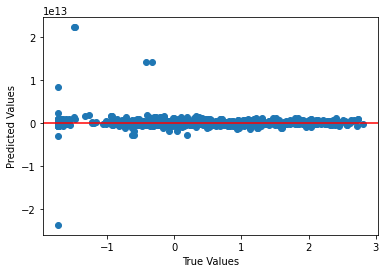

In [163]:
scatter_plot_y_test_pred(y_test, ransac_y_pred, True)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


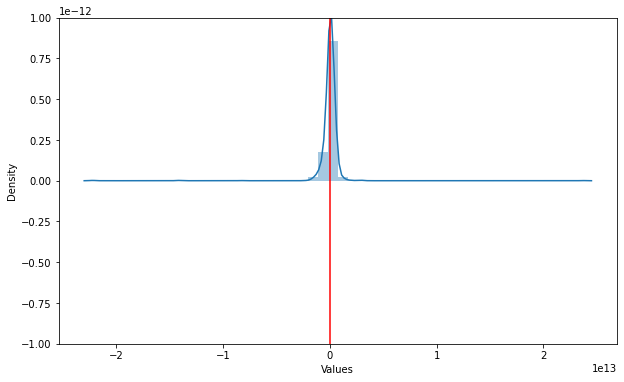

In [164]:
plot_distribution(y_test, ransac_y_pred, 50, True)

In [165]:
# Retrieving the intercept:
print(ransac.estimator_.intercept_)

[0.00096812]


In [166]:
# Retrieving the slope:
print(ransac.estimator_.coef_)

[[ 3.69124658e-01  2.80161499e-01  2.51834949e-02  6.58522965e-02
  -6.92963027e-02  6.47459088e-02 -2.16466923e+11 -3.24803314e+11
   1.80067555e+11 -8.77228781e+10  2.57851258e+11  1.72131296e+11
  -3.28754578e+11  2.28106838e+11 -1.53812974e+11 -1.85299097e+11
   7.87722824e+11  1.13917672e+11  9.09246220e+11  1.63350404e+11
  -8.16828427e+10  1.04214770e+11  1.32956553e+11  1.60976958e+11
   1.76668396e+11 -1.38041420e+11  1.13089879e+11 -2.27286893e+11
   2.81424898e+11  9.38807091e+09  1.33685082e+11  3.46293194e+11
   9.57261674e+10  2.69359782e+11 -9.35097685e+10  3.73997091e+11
   1.78698630e+11  1.22343575e+10  8.20880742e+10 -1.69634449e+11
   1.08125585e+11 -3.19634122e+11 -1.96408225e+11 -1.82937133e+11
  -4.72770319e+10 -1.26475979e+10  2.69156861e+10 -2.00616681e+11
  -2.90670258e+10 -1.00825348e+10 -4.55606951e+10  5.02981801e+10
  -3.56657856e+09  1.90365291e+10 -9.43205250e+09 -1.84964816e+10
  -5.78719790e+10 -2.82724429e+10  5.14779739e+10 -6.61789659e+10
  -7.31406

In [167]:
print_metrics(y_test, ransac_y_pred)

R2 Score:  -1.3747372982331965e+24
MSE:  1.3747372982331965e+24
MAE:  330595808222.07654
RMSE:  1172491918195.2583


In [168]:
results_df = update_metrics_table(results_df, ransac, "RANSAC", ransac_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12


_It seems that **RANSAC** is achieving the same metrics as the Linear Regression._

_I tried tuning the hyperparameters with no positive outcome - I could get the metrics to become worse, but not improve them._

_This leads me to believe that because we have already dealt with outliers when preparing the data, **RANSAC** might not have a lot to do for us here._

---

#### Polynomial Features

_I thought about using Polynomial Features to help improve the metrics._

_However the size of the data shape after running `Polynomial Features` with just the degree of $2$ became too big for running it locally on my machine._

_I even specified `interaction_only=True` to try and reduce the size of the shape, but that was not sufficient._

In [169]:
polynomial_features = PolynomialFeatures(degree=2, interaction_only=True)

In [170]:
x_train_poly = polynomial_features.fit_transform(x_train)

In [171]:
x_train_poly.shape

(6699, 295297)

_The code in the two cells below is commented out as it takes too long and never finishes on my machine._

In [172]:
# poly_lr_model = LinearRegression(fit_intercept=True, normalize=False)
# poly_lr_model.fit(x_train_poly, y_train)

# calculating the accuracies
# print("Training Accuracy :", poly_lr_model.score(x_train_poly, y_train))
# print("Testing Accuracy :", poly_lr_model.score(x_test, y_test))

In [173]:
# y_pred = poly_lr_model.predict(x_test)
# y_pred[0:5]

---

#### Regularization

_To further try and improve the Regression let's try some Regularization._

_Regularization is a method for finding a good bias variance tradeoff._

_It helps to filter out noise from data and handle highly correlated features._

_We are going to try L2, L1 Regularization and we will combine them with Elastic Net which has both L2 and L1 regularization  terms._

---

#### L2 Regularization

In [174]:
L2_regression = Ridge(alpha = 0.01, fit_intercept=True, normalize=False)
L2_regression.fit(x_train, y_train)

Ridge(alpha=0.01)

In [175]:
L2_regression.score(x_train, y_train)

0.9608191015703903

In [176]:
# calculating the accuracies
print("Training Accuracy :", L2_regression.score(x_train,y_train))
print("Testing Accuracy :", L2_regression.score(x_test,y_test))

Training Accuracy : 0.9608191015703903
Testing Accuracy : 0.9190192596593418


In [177]:
l2_y_pred = L2_regression.predict(x_test)
l2_y_pred[0:5]

array([[-0.15207435],
       [-0.52443967],
       [ 1.36820416],
       [ 0.4906949 ],
       [ 1.09900809]])

In [178]:
l2_y_pred.shape

(1675, 1)

In [179]:
print_shape_x_y_train_test(x_train, x_test, y_train, y_test)    

x_train shape: (6699, 768)
x_test shape (1675, 768)
y_train shape (6699, 1)
y_test shape (1675, 1)


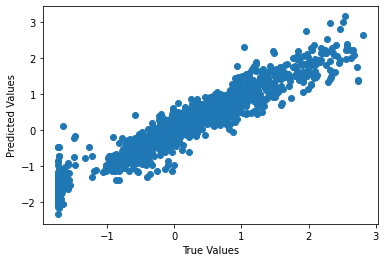

In [180]:
scatter_plot_y_test_pred(y_test, l2_y_pred, False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


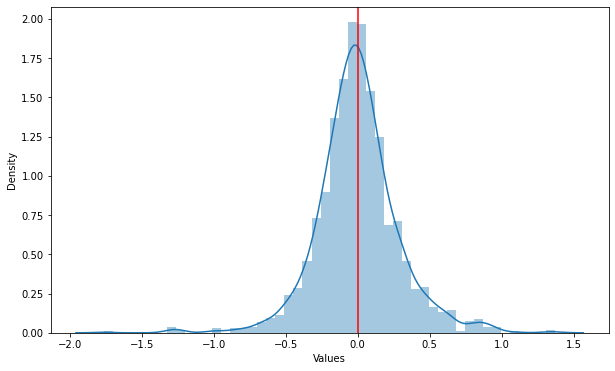

In [181]:
plot_distribution(y_test, l2_y_pred, 50, True)

In [182]:
# Retrieving the intercept:
print(L2_regression.intercept_)

[-4.74223704e-15]


In [183]:
# Retrieving the slope:
print(L2_regression.coef_)

[[ 3.68109773e-01  2.79826296e-01  2.52161748e-02  6.60416683e-02
  -7.02360383e-02  6.62182771e-02  2.38079050e-02  1.59805032e-02
   1.65456934e-02 -2.20196843e-02  5.29442616e-02  4.62931380e-03
   7.23422027e-02  2.08606958e-01  2.78586295e-02 -6.14450949e-02
  -1.75319303e-02 -3.27151952e-01  3.12012870e-03  5.91396406e-03
  -1.88145411e-02 -2.12098947e-02  2.08876675e-02 -2.34727271e-02
   3.03073942e-02  3.25541821e-02  3.77361298e-02  4.16929518e-02
   2.36703765e-02  3.92044060e-02  1.70807911e-02 -1.64525307e-02
  -8.49234938e-02 -1.95785810e-03 -3.65365135e-02  3.11552401e-03
   1.90204669e-02  1.10695093e-02 -1.55695488e-02 -2.96202565e-02
  -1.97701022e-02 -2.66505688e-02  1.08931446e-01 -2.41745845e-02
  -1.47597517e-02  1.53179294e-03 -1.29889235e-02 -4.47704827e-03
  -9.28849292e-03 -2.06626983e-02 -1.65419467e-02 -1.93842936e-02
  -2.57792777e-03  1.60677766e-03 -3.60658050e-03 -3.02922527e-02
  -6.05084370e-03 -9.94195158e-04 -1.03273193e-02 -4.50925160e-02
  -1.80820

In [184]:
print_metrics(y_test, l2_y_pred)

R2 Score:  0.9190192596593418
MSE:  0.08098074034065816
MAE:  0.20269245023631333
RMSE:  0.28457115163111346


In [185]:
results_df = update_metrics_table(results_df, L2_regression, "L2 regression", l2_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01


_L2 is already doing better than than Linear Regression and RANSAC._

---

#### L1 Regularization

_Let's do L1 Regularization next._

In [186]:
L1_regression = Lasso(alpha = 1)
L1_regression.fit(x_train, y_train)

Lasso(alpha=1)

In [187]:
L1_regression.score(x_train, y_train)

0.0

In [188]:
L1_regression = Lasso(alpha = 0.01, fit_intercept=True, normalize=False)
L1_regression.fit(x_train, y_train)

Lasso(alpha=0.01)

In [189]:
L1_regression.score(x_train, y_train)

0.9155407210770801

In [190]:
# Calculating the accuracies:
print("Training Accuracy: ", L1_regression.score(x_train,y_train))
print("Testing Accuracy: ", L1_regression.score(x_test,y_test))

Training Accuracy:  0.9155407210770801
Testing Accuracy:  0.8941362448349885


In [191]:
l1_y_pred = L1_regression.predict(x_test)
l1_y_pred[0:5]

array([-0.42050718, -0.67061448,  1.2065185 ,  0.81710194,  1.31475196])

In [192]:
l1_y_pred.shape

(1675,)

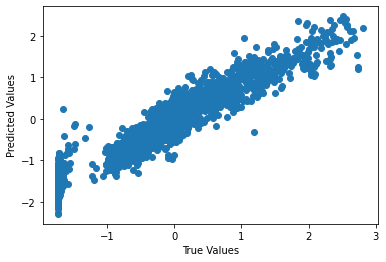

In [193]:
scatter_plot_y_test_pred(y_test, l1_y_pred, False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


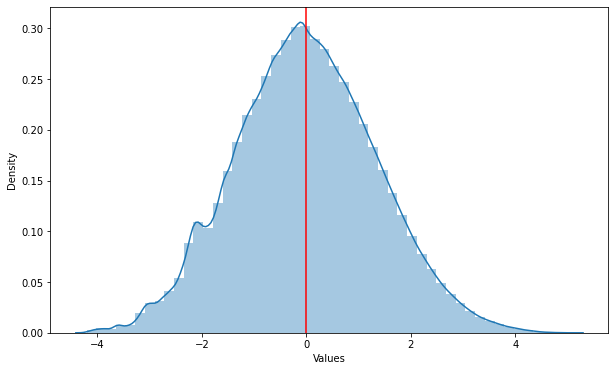

In [194]:
plot_distribution(y_test, l1_y_pred, 50, True)

In [195]:
# Retrieving the intercept:
print(L1_regression.intercept_)

[-4.40324792e-15]


In [196]:
# Retrieving the slope:
print(L1_regression.coef_)

[ 3.65341411e-01  4.08270765e-01  1.97494490e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.91138833e-02  3.50421373e-02  2.75537353e-02  0.00000000e+00
  9.61776313e-02 -0.00000000e+00 -0.00000000e+00 -2.71302229e-02
 -1.16731414e-02 -0.00000000e+00  0.00000000e+00  6.33332359e-03
 -0.00000000e+00 -3.48514380e-03  5.67229249e-03 -1.41391900e-02
  3.37719158e-02  3.49702529e-02  3.78052127e-02  5.52956760e-02
  2.36002441e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -3.62577725e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.42714763e-03  0.00000000e+00 -3.20929332e-03 -2.11273882e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.60465373e-02
 -1.50357527e-03  0.00000000e+00 -7.69913446e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -2.31411355e-03 -8.32017684e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.19399635e-02
 -8.47254411e-03  0.00000

In [197]:
print_metrics(y_test, l1_y_pred)

R2 Score:  0.8941362448349885
MSE:  0.10586375516501143
MAE:  0.2504375306034178
RMSE:  0.32536710830231663


In [198]:
results_df = update_metrics_table(results_df, L1_regression, "L1 regression", l1_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01


_L1 is not doing so great in terms of `Training`, `Testing` accuracy, `R2 score`, however it has a much lower `MSE`._

---

#### Elastic Net

_Let's combine L2 and L1 in Elastic Net next._

In [199]:
en_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
en_model.fit(x_train, y_train)

ElasticNet()

In [200]:
en_model = ElasticNet(alpha=0.01, l1_ratio=0.01)
en_model.fit(x_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.01)

In [201]:
# Calculating the accuracies.
print("Training Accuracy:", en_model.score(x_train, y_train))
print("Testing Accuracy:", en_model.score(x_test, y_test))

Training Accuracy: 0.9595257788829428
Testing Accuracy: 0.9292114105734839


In [202]:
en_y_pred = en_model.predict(x_test)
en_y_pred[0:5]

array([-0.15346542, -0.53166792,  1.37511791,  0.49941553,  1.11256298])

In [203]:
en_y_pred.shape

(1675,)

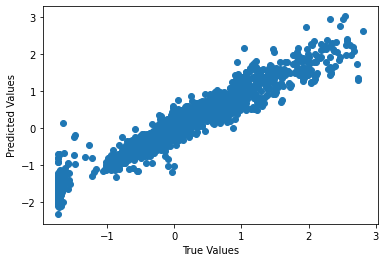

In [204]:
scatter_plot_y_test_pred(y_test, en_y_pred, False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


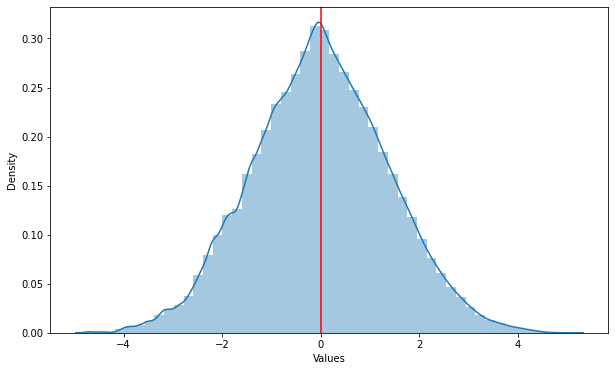

In [205]:
plot_distribution(y_test, en_y_pred, 50, True)

In [206]:
# Retrieving the intercept:
print(en_model.intercept_)

[-4.26325651e-15]


In [207]:
# Retrieving the slope:
print(en_model.coef_)

[ 3.52532218e-01  2.74765733e-01  3.78225136e-02  3.86711066e-02
 -1.65162456e-02  2.88477147e-02  1.40299476e-03  1.32068426e-02
  1.62977005e-02  8.96170384e-03  5.48358279e-02  0.00000000e+00
  8.01604036e-02  6.86758824e-02  2.16419340e-02 -3.70032630e-02
 -2.05156133e-02 -1.33484235e-01  2.37904833e-03  5.60495179e-03
 -1.26937923e-02 -1.71597984e-02  2.47209455e-02 -2.39567826e-02
  2.87528206e-02  3.49517875e-02  4.12667912e-02  4.58267449e-02
  2.48118490e-02  1.47430618e-02  1.02101227e-02 -1.42542164e-02
 -6.78438880e-02 -7.75060902e-03 -3.31611859e-02 -2.29392973e-03
  2.00643057e-02  8.77594446e-03 -1.74691950e-02 -3.28128501e-02
 -1.86196322e-02 -2.38151879e-02  2.78502786e-03  1.28039958e-02
 -1.14732335e-02  2.46185010e-03 -1.73796700e-02 -3.36079375e-03
 -8.27340428e-03 -1.38424104e-02 -1.37272863e-02 -2.20225869e-02
 -2.57598650e-03 -3.74473566e-03 -3.64052319e-03 -2.03734841e-02
 -5.57285162e-03 -4.05273909e-04 -1.01444433e-02 -4.42354360e-02
 -1.70668242e-02  8.02239

 -0.00000000e+00 -3.62578279e-02 -3.46455532e-02 -8.96337398e-03]


In [208]:
print_metrics(y_test, en_y_pred)

R2 Score:  0.9292114105734839
MSE:  0.07078858942651614
MAE:  0.18887448017399872
RMSE:  0.2660612512684178


In [209]:
results_df = update_metrics_table(results_df, en_model, "Elastic Net", en_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01
4,Elastic Net,0.959526,9.292114e-01,9.292114e-01,7.078859e-02,1.888745e-01,2.660613e-01


_So, we can see Elastic Net has high `Training`, `Testing` accuracy, `R2 score` results, and an overall lower `MSE`, compared to L2 and L1._

---

_Let's see if we can use other algorithms to create better models than Linear Regression._

---

### Support Vector Machine

> "Support Vector Machine" (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.
> However, it is mostly used in classification problems. 
> In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

_For the SVR we will use an `rbf` kernel - **R**adial **B**asis **F**unction (Gaussian) kernel._

In [210]:
# This cell will take some time depending on the specs of your machine.
svr_model = SVR(kernel = 'rbf')
svr_model.fit(x_train, y_train.ravel())

# Calculating the accuracies:
print("Training Accuracy :", svr_model.score(x_train,y_train))
print("Testing Accuracy :", svr_model.score(x_test,y_test))

Training Accuracy : 0.9480643416481302
Testing Accuracy : 0.888542030625098


In [211]:
svr_y_pred = svr_model.predict(x_test)
svr_y_pred[0:5]

array([-0.09974288, -0.51854523,  1.37920789,  0.27618522,  1.16411643])

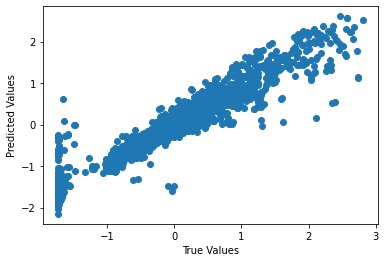

In [212]:
scatter_plot_y_test_pred(y_test, svr_y_pred, False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


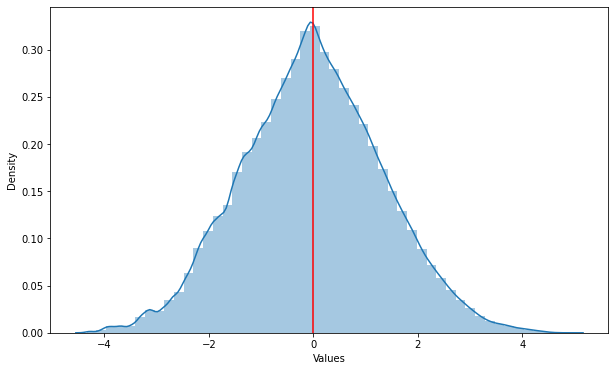

In [213]:
plot_distribution(y_test, svr_y_pred, 50, True)

In [214]:
print_metrics(y_test, svr_y_pred)

R2 Score:  0.888542030625098
MSE:  0.11145796937490203
MAE:  0.21168027010574453
RMSE:  0.33385321531311035


In [215]:
results_df = update_metrics_table(results_df, svr_model, "Support Vector Machine - SVR", svr_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01
4,Elastic Net,0.959526,9.292114e-01,9.292114e-01,7.078859e-02,1.888745e-01,2.660613e-01
5,Support Vector Machine - SVR,0.948064,8.885420e-01,8.885420e-01,1.114580e-01,2.116803e-01,3.338532e-01


_We can see **SVR** has lower `Training`, `Testing` accuracy, `R2 score` results, however it has a much lower `MSE`, `MAE` and `RMSE`, compared to the rest._

_This might be a tradeoff we could be willing to do if we determine that the previous models were overfitting and that this one, albeit with lower scores, more accurately describes and predicts the data._

---

### We stop and we think

_Let's pause for a moment and contemplate and reflect on what requirements we might want for our model to meet in order to consider it good enough for our purposes, so that we can consider it dependable._

_Currently for the prurpose of this article, I would like us to find an algorithm with metric scores of:_
- _`Testing accuracy:` $\ge$ $95\%$_
- _`R2 score:` $\ge$ $95\%$_
- _`MSE` $\le$ $5\%$_
- _`MAE` $\le$ $2\%$_
- _`RMSE` $\le$ $3\%$_

_Maybe we can think of these new requirements as a result of constantly using the **Scientific method** and questioning and evolving our hypothesis as we progress. Perhaps we can say that we can add these new requirements as a condition that they need to be met in order for uss to reject our **Null hypothesis**._

_So, let's try a couple of other algorithms and see if we get close to the desired scores._

---

### Random forest

> Random forest is like bootstrapping algorithm with Decision tree (CART) model. Say, we have 1000 observation in the complete population with 10 variables. Random forest tries to build multiple CART models with different samples and different initial variables. For instance, it will take a random sample of 100 observation and 5 randomly chosen initial variables to build a CART model. It will repeat the process (say) 10 times and then make a final prediction on each observation. Final prediction is a function of each prediction. This final prediction can simply be the mean of each prediction.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

In [216]:
rf_model=RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(x_train, y_train.ravel())

# calculating the accuracies
print("Training Accuracy:", rf_model.score(x_train, y_train))
print("Testing Accuracy:", rf_model.score(x_test, y_test))

Training Accuracy: 0.9824023846680893
Testing Accuracy: 0.9485782241455637


In [217]:
rf_y_pred = rf_model.predict(x_test)
rf_y_pred[0:5]

array([-0.26972194, -0.59440867,  1.49432039,  0.52967783,  1.28921784])

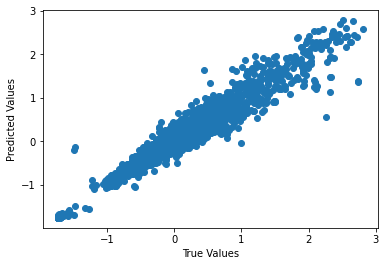

In [218]:
scatter_plot_y_test_pred(y_test, rf_y_pred, False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


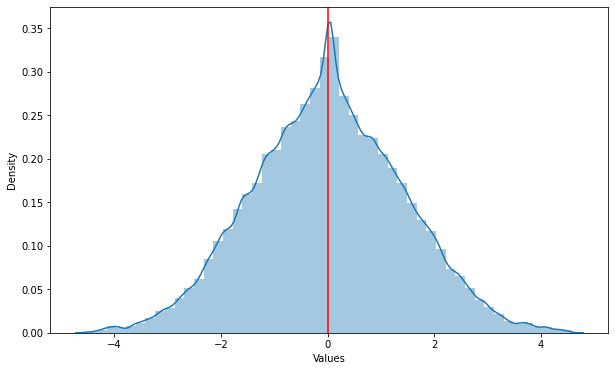

In [219]:
plot_distribution(y_test, rf_y_pred, 50, True)

In [220]:
print_metrics(y_test, rf_y_pred)

R2 Score:  0.9485782241455637
MSE:  0.05142177585443633
MAE:  0.15654848380809702
RMSE:  0.2267637004779123


In [221]:
results_df = update_metrics_table(results_df, rf_model, "Random Forest", rf_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01
4,Elastic Net,0.959526,9.292114e-01,9.292114e-01,7.078859e-02,1.888745e-01,2.660613e-01
5,Support Vector Machine - SVR,0.948064,8.885420e-01,8.885420e-01,1.114580e-01,2.116803e-01,3.338532e-01
6,Random Forest,0.982402,9.485782e-01,9.485782e-01,5.142178e-02,1.565485e-01,2.267637e-01


_**Random Forest** seems to be doing better than the rest we have tried so far._

_Let's see what features are most important for predicting price in this case?_

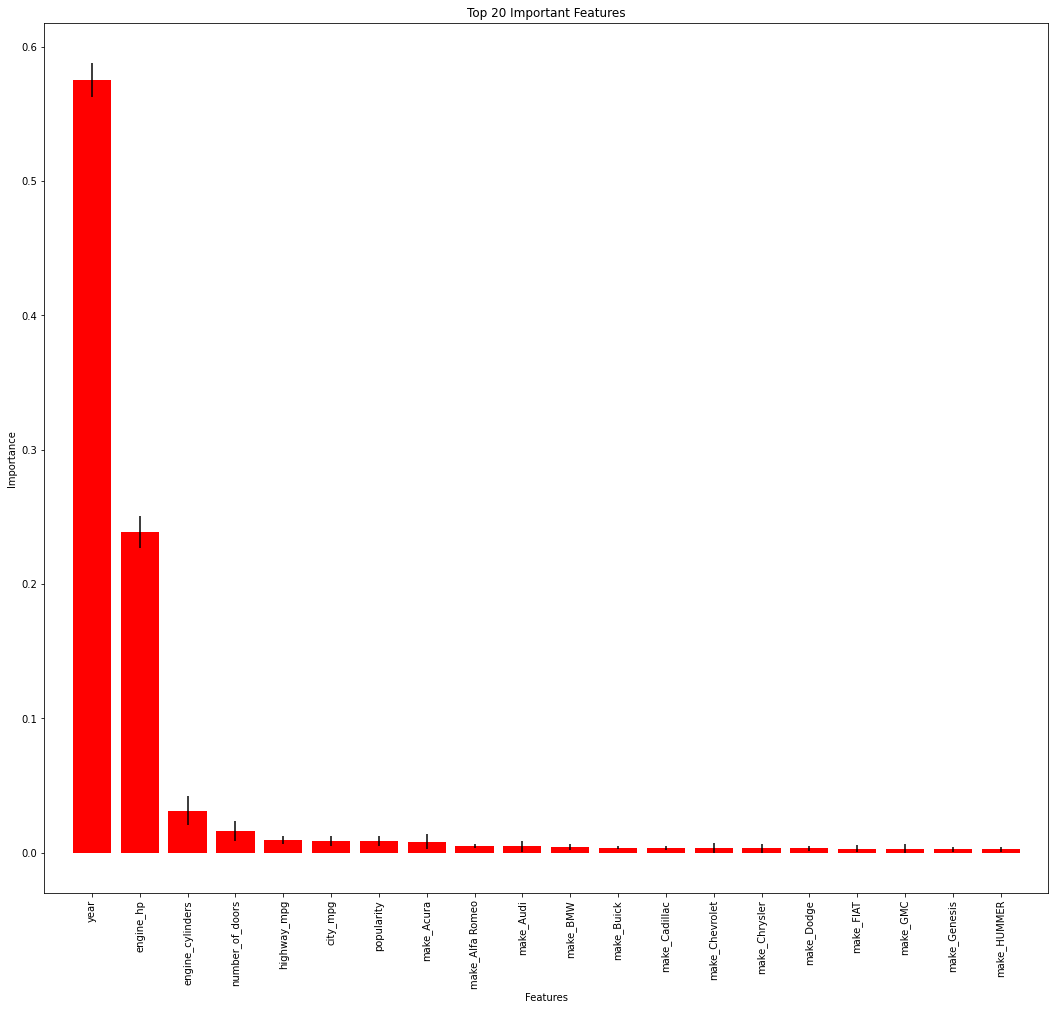

In [222]:
# Reference: https://www.kaggle.com/jshih7/car-price-prediction

# 1. What features are most important for predicting price?

# Get the importances and calculate standard deviations for each.
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Get the feature names.
features = x_orig.columns.values

# Want the top 20 features, so limit the indices and labels.
topLimit = 20 # Limit to show up to, ex. top 10.
indices = indices[0: topLimit] # Indices for features.
topLabels = features[0: topLimit] # Actual feature labels, we want to print these.

# Plot the feature importances of the forest.
figsize = (18,16)
plt.figure(figsize=figsize)
plt.title("Top 20 Important Features")
ax = plt.bar(range(topLimit), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(rotation=90)
plt.xticks(range(topLimit), topLabels)
plt.xlim([-1, topLimit])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

_Looks like **year** and **engine_hp** are the most important features._

[[Reference]](#Car-Price-Prediction---JEFFREY-SHIH)

#### Hyperparameter tuning with GridSearchCV for Random Forest Reggresion

In [223]:
print('Parameters currently in use:\n')
print(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


- `n_estimators` = number of trees in the foreset 
- `max_features` = max number of features considered for splitting a node 
- `max_depth` = max number of levels in each decision tree 
- `min_samples_split` = min number of data points placed in a node before the node is split 
- `min_samples_leaf` = min number of data points allowed in a leaf node 
- `bootstrap` = method for sampling data points (with or without replacement)

[[Reference]](#linear-reggresion---SAICHARAN-REDDY)

In [224]:
forest_reg_make = RandomForestRegressor(n_estimators=50, random_state=42)
forest_reg_make.fit(x_train, y_train.ravel())

RandomForestRegressor(n_estimators=50, random_state=42)

_Let's get a feel of a few price predictions to see how close or far are they._

In [225]:
carSales_predictions = forest_reg_make.predict(x_test)
forest_mse = mean_squared_error(np.exp(y_test), np.exp(carSales_predictions))
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regressor RMSE:" + str(forest_rmse))
print("predicted prices")
print(np.exp(carSales_predictions[0:5]))
print("actual prices")
print(np.exp(y_test[0:5]))

Random Forest Regressor RMSE:0.8913372246505503
predicted prices
[0.76359179 0.55188882 4.45630696 1.69838505 3.62994623]
actual prices
[[0.72458203]
 [0.54467222]
 [3.56759093]
 [1.68973984]
 [2.80160491]]


_We will now use GridSearch to find the optimum parameters for RandomForestRegression._

In [226]:
param_grid = [
    # try 12 (3*4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2*3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(n_estimators=50, random_state=42)
# train across 2 folds, that's a total of (12+6)*2=36 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=2,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train.ravel())
print("BEST PARAMETERS FOR RANDOM FOREST REGRESSOR IS:")
grid_search.best_params_

BEST PARAMETERS FOR RANDOM FOREST REGRESSOR IS:


{'max_features': 8, 'n_estimators': 30}

In [227]:
# Fit using best parameters and check
forest_reg_make = RandomForestRegressor(max_features=8,n_estimators=30)
forest_reg_make.fit(x_train,y_train.ravel())

RandomForestRegressor(max_features=8, n_estimators=30)

_Let's get a feel of a few price predictions again, to see how close or far are they._

In [228]:
carSales_predictions = forest_reg_make.predict(x_test)
forest_mse = mean_squared_error(np.exp(y_test), np.exp(carSales_predictions))
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regressor RMSE:" + str(forest_rmse))
print("predicted prices")
print(np.exp(carSales_predictions[0:5]))
print("actual prices")
print(np.exp(y_test[0:5]))

Random Forest Regressor RMSE:0.8815829295806309
predicted prices
[0.81304488 0.57867299 4.16580681 1.47360012 3.17507599]
actual prices
[[0.72458203]
 [0.54467222]
 [3.56759093]
 [1.68973984]
 [2.80160491]]


_Hmm, they seem to be slightly worse than the ones with default parameters. Let's see the scores._

In [229]:
print_metrics(y_test, carSales_predictions)

R2 Score:  0.9505940423744853
MSE:  0.04940595762551469
MAE:  0.16217942152182754
RMSE:  0.22227450961708292


In [230]:
results_df = update_metrics_table(results_df, forest_reg_make, "Random Forest GridSearchCV", carSales_predictions)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01
4,Elastic Net,0.959526,9.292114e-01,9.292114e-01,7.078859e-02,1.888745e-01,2.660613e-01
5,Support Vector Machine - SVR,0.948064,8.885420e-01,8.885420e-01,1.114580e-01,2.116803e-01,3.338532e-01
6,Random Forest,0.982402,9.485782e-01,9.485782e-01,5.142178e-02,1.565485e-01,2.267637e-01
7,Random Forest GridSearchCV,0.980527,9.505940e-01,9.505940e-01,4.940596e-02,1.621794e-01,2.222745e-01


_**The observation is - the default parameters give better results in this case.**_

_Let's do some cross validation using K-fold Cross validation with k set to 2._

_The fold is only 2 because this takes a lot of time and the goal of this notebook is to serve as a demonstration._

In [231]:
kfold = KFold(n_splits = 2)
forest_scores = cross_val_score(forest_reg_make, x_train, y_train.ravel(), scoring="neg_mean_squared_error",cv=kfold)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Scores of each fold:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard Deviation:", forest_rmse_scores.std())

Scores of each fold: [0.27043858 0.28444673]
Mean: 0.2774426571568367
Standard Deviation: 0.007004073482767159


_This shows there is a good fit and that there is very little variation between the folds and the data is dependable._

[[Reference]](#UsedCarPricePrediction---ANIRBANK)

#### Visualizing the predictions

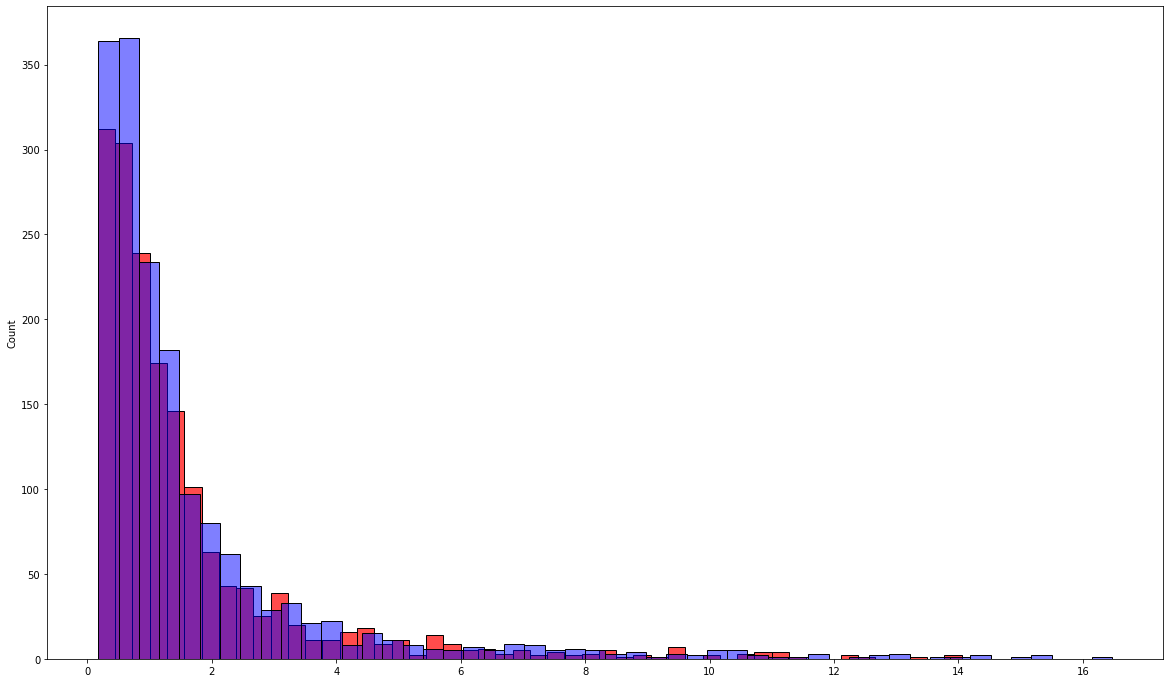

In [232]:
"""Visualizing the Predictions"""
plt.figure(figsize = (20,12))
sns.histplot(np.exp(carSales_predictions), color = 'red', alpha = 0.7, bins = 50)
sns.histplot(np.exp(y_test).flatten(), color = 'blue', alpha = 0.5, bins = 50);
plt.show()

_In this graphic we can see how the model is doing in terms of predictions (in `red` colour) compared to the test data (in `blue` colour). It is underestimating in some cases and overestimating in other cases._

[[Reference]](#Car-Price-Pridiction---NIKHIL-SHRESTHA)

---

_Let's see if we can do more with a different algorithm._

### LGBM Regressor

> Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithms. It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’. 
>
> [[Reference]](#Used-Cars-Price-Prediction-by-15-models---VITALII-MOKIN)
> [[Reference]](#Which-algorithm-takes-the-crown:-Light-GBM-vs-XGBOOST?)

In [233]:
lgm_model = LGBMRegressor(n_estimators = 50, random_state=42)
lgm_model.fit(x_train, y_train.ravel())

print(lgm_model)

LGBMRegressor(n_estimators=50, random_state=42)


In [234]:
lgm_y_pred = lgm_model.predict(x_test)
lgm_y_pred[0:5]

array([-0.26991749, -0.50859669,  1.4805175 ,  0.57340505,  1.25448768])

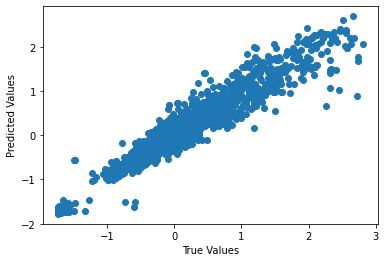

In [235]:
scatter_plot_y_test_pred(y_test, lgm_y_pred, False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


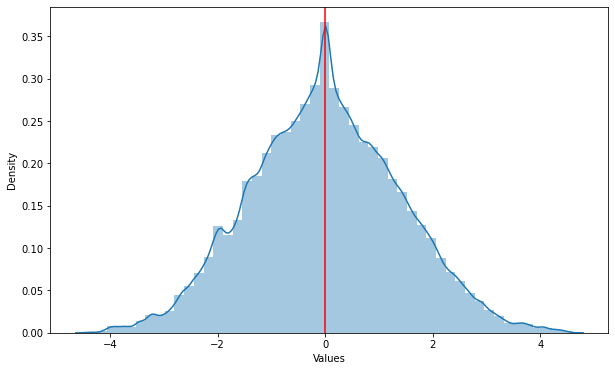

In [236]:
plot_distribution(y_test, lgm_y_pred, 50, True)

_This time the distribution seems almost like a perfect Gaussian distribution on this graphic, better than the other ones we have had so far._

In [237]:
print_metrics(y_test, lgm_y_pred)

R2 Score:  0.9394055958969745
MSE:  0.060594404103025544
MAE:  0.17033572474943642
RMSE:  0.24615930635063454


In [238]:
results_df = update_metrics_table(results_df, lgm_model, "LGBM Regressor", lgm_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01
4,Elastic Net,0.959526,9.292114e-01,9.292114e-01,7.078859e-02,1.888745e-01,2.660613e-01
5,Support Vector Machine - SVR,0.948064,8.885420e-01,8.885420e-01,1.114580e-01,2.116803e-01,3.338532e-01
6,Random Forest,0.982402,9.485782e-01,9.485782e-01,5.142178e-02,1.565485e-01,2.267637e-01
7,Random Forest GridSearchCV,0.980527,9.505940e-01,9.505940e-01,4.940596e-02,1.621794e-01,2.222745e-01
8,LGBM Regressor,0.955591,9.394056e-01,9.394056e-01,6.059440e-02,1.703357e-01,2.461593e-01


_We can see LGBM Regressor is already doing better than the other algormithms used so far._

_Let's do some cross validation using K-fold Cross validation with k set to 2._

_The fold is only 2 because this takes a lot of time and the goal of this notebook is to serve as a demonstration._

In [239]:
lgbm_kfold = KFold(n_splits = 2)
lgbm_kfold_scores = cross_val_score(lgm_model, x_train, y_train.ravel(), scoring="neg_mean_squared_error", cv = lgbm_kfold)
lgbm_kfold_scores = np.sqrt(-lgbm_kfold_scores)

# print(lgbm_kfold_scores)
# print(np.mean(lgbm_kfold_scores))
print("Scores of each fold:", lgbm_kfold_scores)
print("Mean:", lgbm_kfold_scores.mean())
print("Standard Deviation:", lgbm_kfold_scores.std())

Scores of each fold: [0.24998759 0.26389562]
Mean: 0.2569416032259994
Standard Deviation: 0.006954014751231294


_This shows there is a good fit and that there is very little variation between the folds and the data is dependable._

---

_Let's try a boosting algorithm and see how it does compared to the other algormithms and if it can get us closer to the scores we are after._

---

### XGBRegressor

> **What is XGBoost?**
>
> XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.
>
> **Why does XGBoost perform so well?**
>
> XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. However, XGBoost improves upon the base GBM framework through systems optimization and algorithmic enhancements.

[[Reference]](#XGBoost-Algorithm:-Long-May-She-Reign!)

_For more information and intuition see this section [How to build an intuition for XGBoost](#How-to-build-an-intuition-for-XGBoost?)._

In [240]:
xgb1 = XGBRegressor()
parameters = {'n_estimators': [50], 'random_state': [42]}

xgb_grid = GridSearchCV(xgb1, parameters, cv = 2)

xgb_grid.fit(x_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [241]:
print(xgb_grid.best_score_)

0.9446936581834344


In [242]:
xgb_grid.best_params_

{'n_estimators': 50, 'random_state': 42}

In [243]:
xgb_predict = xgb_grid.predict(x_test)

In [244]:
xgb_y_pred = xgb_predict
xgb_y_pred[0:5]

array([-0.27270705, -0.5879296 ,  1.4026128 ,  0.652941  ,  1.3291397 ],
      dtype=float32)

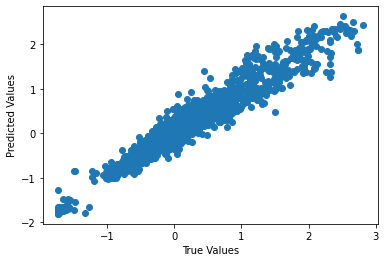

In [245]:
scatter_plot_y_test_pred(y_test, xgb_y_pred, False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


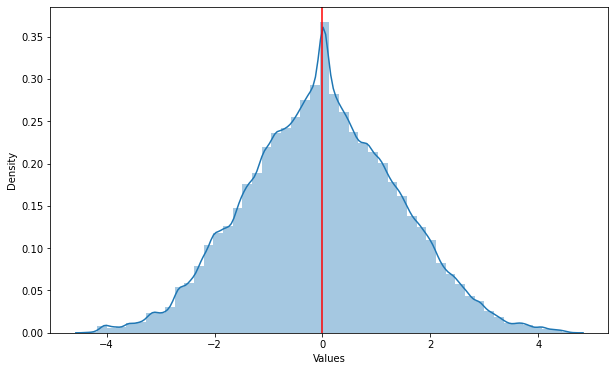

In [246]:
plot_distribution(y_test, xgb_y_pred, 50, True)

In [247]:
print_metrics(y_test, xgb_y_pred)

R2 Score:  0.9525553352014838
MSE:  0.04744466479851613
MAE:  0.15824193905100156
RMSE:  0.21781796252493993


In [248]:
results_df = update_metrics_table(results_df, xgb_grid, "XGB Regressor", xgb_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01
4,Elastic Net,0.959526,9.292114e-01,9.292114e-01,7.078859e-02,1.888745e-01,2.660613e-01
5,Support Vector Machine - SVR,0.948064,8.885420e-01,8.885420e-01,1.114580e-01,2.116803e-01,3.338532e-01
6,Random Forest,0.982402,9.485782e-01,9.485782e-01,5.142178e-02,1.565485e-01,2.267637e-01
7,Random Forest GridSearchCV,0.980527,9.505940e-01,9.505940e-01,4.940596e-02,1.621794e-01,2.222745e-01
8,LGBM Regressor,0.955591,9.394056e-01,9.394056e-01,6.059440e-02,1.703357e-01,2.461593e-01
9,XGB Regressor,0.966952,9.525553e-01,9.525553e-01,4.744466e-02,1.582419e-01,2.178180e-01


_Let's do some cross validation using K-fold Cross validation with k set to 2._

_The fold is only 2 because this takes a lot of time and the goal of this notebook is to serve as a demonstration._

In [249]:
kfold = KFold(n_splits = 2)
scores = cross_val_score(xgb_grid, x_train, y_train, scoring="neg_mean_squared_error", cv = kfold)
tree_rmse_scores = np.sqrt(-scores)

print("Scores of each fold:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard Deviation:", tree_rmse_scores.std())

Scores of each fold: [0.23248643 0.23750073]
Mean: 0.2349935811896401
Standard Deviation: 0.002507148409555515


_This shows there is a good fit and that there is very little variation between the folds and the data is dependable._

---

## Final results

In [250]:
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01
4,Elastic Net,0.959526,9.292114e-01,9.292114e-01,7.078859e-02,1.888745e-01,2.660613e-01
5,Support Vector Machine - SVR,0.948064,8.885420e-01,8.885420e-01,1.114580e-01,2.116803e-01,3.338532e-01
6,Random Forest,0.982402,9.485782e-01,9.485782e-01,5.142178e-02,1.565485e-01,2.267637e-01
7,Random Forest GridSearchCV,0.980527,9.505940e-01,9.505940e-01,4.940596e-02,1.621794e-01,2.222745e-01
8,LGBM Regressor,0.955591,9.394056e-01,9.394056e-01,6.059440e-02,1.703357e-01,2.461593e-01
9,XGB Regressor,0.966952,9.525553e-01,9.525553e-01,4.744466e-02,1.582419e-01,2.178180e-01


_If we look at the following algorithms with higher scores:_

- _`Random Forest`_
- _`Random Forest GridSearchCV`_
- _`LGBM regressor`_
- _`XGB regressor`_


_Now, when we compare the results, from the above table, the most suitable algorithm for the given dataset is `XGB Regressor` with:_
- _`Testing Accuracy`: ~$95.3\%$._
- _**Highest** `R2 Score`: ~$95.3\%$._
- _**Lowest** `MSE`: ~$47.4\%$._
- _`MAE`: ~$15.8\%$._
- _**Lowest**`RMSE`: ~$21.8\%$._

_The`XGB regressor` also best meets the requirements we set in the [We stop and we think](#We-stop-and-we-think) section._

_We can see that `XGB regressor` has the highest `R2 score` which means that it has lower variance than the rest of the algorithms._

_Looking at these in the results table we can see that `XGB regressor` has the **lowest** `MSE`, `RMSE` and a **low** `MAE`, as well as the **highest** `R2 Score` when compared to the other models._

_Because of this if I had to choose a model to use, I would choose `XGB regressor`, with `LGBM Regressor` being a close runner up, as it is a relatively "quick" algorithm, that's what the `'L'` as in "`L`ight Gradient Boosting Regressor" stands for._

---

## Bonus

_As a bonus here is a very simple demo of a **Neural Network** performing on the dataset._

_Initially I ran the Neural Network without specifying any `hidden_layer_sizes` and it achieved a testing accuracy of $87.4\%$._

_Then I added the `hidden_layer_sizes = (10, 10, 10)` like so in the code below, and achieved better testing accuracy of $88.6\%$_.

In [251]:
neural_network = MLPRegressor(hidden_layer_sizes = (10, 10, 10), activation = 'relu')

neural_network.fit(x_train, y_train.ravel())

MLPRegressor(hidden_layer_sizes=(10, 10, 10))

In [252]:
neural_network_predict = neural_network.predict(x_test)

In [253]:
nn_y_pred = neural_network_predict
nn_y_pred[0:5]

array([-0.10498379, -0.44704142,  1.2276839 ,  0.59996858,  0.83164758])

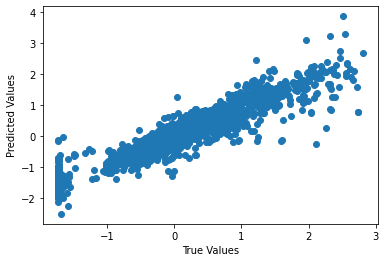

In [254]:
scatter_plot_y_test_pred(y_test, nn_y_pred, False)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


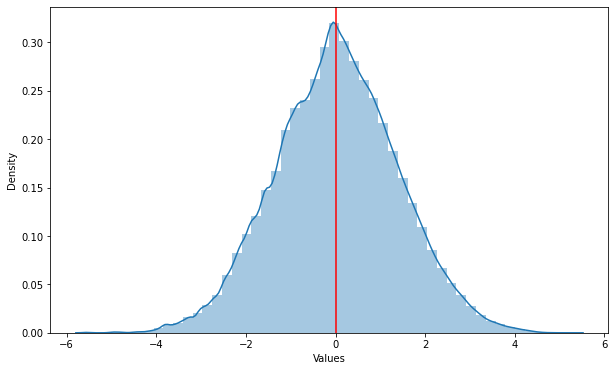

In [255]:
plot_distribution(y_test, nn_y_pred, 50, True)

In [256]:
print_metrics(y_test, nn_y_pred)

R2 Score:  0.8770278799680997
MSE:  0.12297212003190032
MAE:  0.23857344695983843
RMSE:  0.35067380859126096


In [257]:
results_df = update_metrics_table(results_df, neural_network, "Neural Network", nn_y_pred)
results_df

,Model,Training Accuracy %,Testing Accuracy %,R2 score,MSE,MAE,RMSE
0,Linear Regression,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
1,RANSAC,0.960726,-1.374737e+24,-1.374737e+24,1.374737e+24,3.305958e+11,1.172492e+12
2,L2 regression,0.960819,9.190193e-01,9.190193e-01,8.098074e-02,2.026925e-01,2.845712e-01
3,L1 regression,0.915541,8.941362e-01,8.941362e-01,1.058638e-01,2.504375e-01,3.253671e-01
4,Elastic Net,0.959526,9.292114e-01,9.292114e-01,7.078859e-02,1.888745e-01,2.660613e-01
5,Support Vector Machine - SVR,0.948064,8.885420e-01,8.885420e-01,1.114580e-01,2.116803e-01,3.338532e-01
6,Random Forest,0.982402,9.485782e-01,9.485782e-01,5.142178e-02,1.565485e-01,2.267637e-01
7,Random Forest GridSearchCV,0.980527,9.505940e-01,9.505940e-01,4.940596e-02,1.621794e-01,2.222745e-01
8,LGBM Regressor,0.955591,9.394056e-01,9.394056e-01,6.059440e-02,1.703357e-01,2.461593e-01
9,XGB Regressor,0.966952,9.525553e-01,9.525553e-01,4.744466e-02,1.582419e-01,2.178180e-01


---

## Conclusion

_As we can see from the table in the [Final results](#Final_results) section, **we can indeed use Machine Learning to predict MSRP (manufacturer’s suggested retail price) of cars** as we can achieve accuracy of around $95\%$ from some of the algorithms._

_This means that we can have confidence in them and trust them to do these complex predictions for us and help us define, expect or adjust prices for the future._

*Thus we can say that we have both answered our question using the scientific method and we have rejected our [Null Hypothesis $(H_{0})$](#Null-hypothesis-$(H_{0})$) and proved our [Alternative Hypothesis $(H_{1})$](#Alternative-hypothesis-$(H_{1})$) with the experiments carried out of training and then testing different Machine Learning algorithms and seeing if they achieve accuracy levels which are good and can be useful for prediction.*

### Further development

_I think this article can be further developed in one or more of the following ways:_

- _Do more hyperparameter tunning of the models to try and see if we can get them to perform even better, especially if able to run this notebook on a more powerful machine or on a cloud platform._

- _Do more feature engineering._

- _Perform PCA to speed up SVMs._

- _Use a bigger data set, as this one seems to be small for training and getting reliable results from some of the models._

- _Maybe try to turn it into a classification task and see if we can predict if a car fall under a "luxury" class or not, based on its features._

- _If we have confidence that our predicitoins are accureate we can use them to determine what cars are the most over-priced for their feature set._

---

## Appendix A<a id="AppendixA"></a>

### Glossary

- MSRP - manufacturer’s suggested retail price
- EDA - exploratory data analysis
- NN - Neural Network

### Table of Contents

*In order to use a Table of Contents for this article, please use the `toc2` extension from `Nbextensions` for Jupyter Notebook. You can find instructions on how to install and use it in this <a href="https://stackoverflow.com/questions/21151450/how-can-i-add-a-table-of-contents-to-a-jupyter-jupyterlab-notebook">link</a>.*

### Definitions

**R2 score**

> What is r2 score?
> 
> The r2 score varies between 0 and 100%. It is closely related to the MSE (see below), but not the same. [Wikipedia](#Wikipedia---Coefficient-of-determination) defines r2 as
> 
> "...the proportion of the variance in the dependent variable that is predictable from the independent variable(s)."
> 
> Another definition is "(total variance explained by model) / total variance." So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.
> 
> [[Reference]](#Mean-Square-Error-&-R2-Score-Clearly-Explained)

#### Mean squared error (MSE)

>In statistics, the mean squared error (MSE)[1][2] or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.[according to whom?][clarification needed] The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.[3]
>
> The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, it is always a positive value with the error decreasing as the error approaches zero.[clarification needed]
>
> The MSE is the second moment (about the origin) of the error,[clarification needed] and thus incorporates both the variance of the estimator (how widely spread the estimates are from one data sample to another) and its bias (how far off the average estimated value is from the true value).[citation needed] For an unbiased estimator, the MSE is the variance of the estimator. Like the variance, MSE has the same units of measurement as the square of the quantity being estimated. In an analogy to standard deviation, taking the square root of MSE yields the root-mean-square error or root-mean-square deviation (RMSE or RMSD), which has the same units as the quantity being estimated; for an unbiased estimator, the RMSE is the square root of the variance, known as the standard error.
>
> [[Reference]](#Wikipedia---Mean-squared-error)

> **Mean Squared Error (MSE)**
>
> Mean Squared Error (also called L2 loss) is almost every data scientist’s preference when it comes to loss functions for regression. This is because most variables can be modeled into a Gaussian distribution.
>
> Mean Squared Error is the average of the squared differences between the actual and the predicted values. For a data point Yi and its predicted value Ŷi, where n is the total number of data points in the dataset, the mean squared error is defined as:
>
> <img src="./images/mean-squared-error.png" width="480"/>
> 
> [[Reference]](#Understanding-Loss-Functions-in-Machine-Learning)

#### Root-mean-square deviation (RMSE)

> The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various data points into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.[1]
>
> RMSD is always non-negative, and a value of 0 (almost never achieved in practice) would indicate a perfect fit to the data. In general, a lower RMSD is better than a higher one. However, comparisons across different types of data would be invalid because the measure is dependent on the scale of the numbers used.
>
> RMSD is the square root of the average of squared errors. The effect of each error on RMSD is proportional to the size of the squared error; thus larger errors have a disproportionately large effect on RMSD. Consequently, RMSD is sensitive to outliers.[2][3]
>
> [[Reference]](#Wikipedia---Root-mean-square-deviation)

#### Mean absolute error (MAE)

> In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:
>
> ${\displaystyle \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}={\frac {\sum _{i=1}^{n}\left|e_{i}\right|}{n}}.}[1]$
>
> It is thus an arithmetic average of the absolute errors ${\displaystyle |e_{i}|=|y_{i}-x_{i}|}$, where ${\displaystyle y_{i}}$ is the prediction and ${\displaystyle x_{i}}$ the true value. Note that alternative formulations may include relative frequencies as weight factors. The mean absolute error uses the same scale as the data being measured. This is known as a scale-dependent accuracy measure and therefore cannot be used to make comparisons between series using different scales.[2] The mean absolute error is a common measure of forecast error in time series analysis,[3] sometimes used in confusion with the more standard definition of mean absolute deviation. The same confusion exists more generally.
>
> [[Reference]](#Wikipedia---Mean-absolute-error)


> **Mean Absolute Error (MAE)**
>
> Mean Absolute Error (also called L1 loss) is one of the most simple yet robust loss functions used for regression models.
> 
> Regression problems may have variables that are not strictly Gaussian in nature due to the presence of outliers (values that are very different from the rest of the data). Mean Absolute Error would be an ideal option in such cases because it does not take into account the direction of the outliers (unrealistically high positive or negative values).
> 
> As the name suggests, MAE takes the average sum of the absolute differences between the actual and the predicted values. For a data point xi and its predicted value yi, n being the total number of data points in the dataset, the mean absolute error is defined as:
> 
> <img src="./images/mean-absolute-error.png" width="480"/>
> 
> [[Reference]](#Understanding-Loss-Functions-in-Machine-Learning)

#### Cost Function of Linear Regression

> Cost function measures how a machine learning model performs.
>
> Cost function is the calculation of the error between predicted values and actual values, represented as a single real number.
>
> The difference between the cost function and loss function is as follows:
>
> The cost function is the average error of n-samples in the data (for the whole training data) and the loss function is the error for individual data points (for one training example).
>
> The cost function of a linear regression is root mean squared error or mean squared error. They are both the same; just we square it so that we don’t get negative values.
>
> <img src="./images/topcoder linear regression 2.png" width="300"/>
>
> [[References]](#Topcoder---INTRODUCTION-TO-LINEAR-REGRESSION)

#### How to build an intuition for XGBoost?

> Imagine that you are a hiring manager interviewing several candidates with excellent qualifications. Each step of the evolution of tree-based algorithms can be viewed as a version of the interview process.
>
> **Decision Tree**: Every hiring manager has a set of criteria such as education level, number of years of experience, interview performance. A decision tree is analogous to a hiring manager interviewing candidates based on his or her own criteria.
> 
> **Bagging**: Now imagine instead of a single interviewer, now there is an interview panel where each interviewer has a vote. Bagging or bootstrap aggregating involves combining inputs from all interviewers for the final decision through a democratic voting process.
> 
> **Random Forest**: It is a bagging-based algorithm with a key difference wherein only a subset of features is selected at random. In other words, every interviewer will only test the interviewee on certain randomly selected qualifications (e.g. a technical interview for testing programming skills and a behavioral interview for evaluating non-technical skills).
> 
> **Boosting**: This is an alternative approach where each interviewer alters the evaluation criteria based on feedback from the previous interviewer. This ‘boosts’ the efficiency of the interview process by deploying a more dynamic evaluation process.
> 
> **Gradient Boosting**: A special case of boosting where errors are minimized by gradient descent algorithm e.g. the strategy consulting firms leverage by using case interviews to weed out less qualified candidates.
> 
> **XGBoost**: Think of XGBoost as gradient boosting on ‘steroids’ (well it is called ‘Extreme Gradient Boosting’ for a reason!). It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.
> 
> [[Reference]](#XGBoost-Algorithm:-Long-May-She-Reign!)

---

## References <a id="ReferencesSection"></a>

### kaggle.com
<https://www.kaggle.com/CooperUnion/cardataset>

### kaggle - Car Features and MSRP
<https://www.kaggle.com/CooperUnion/cardataset>

### kaggle - Car Features and MSRP code
<https://www.kaggle.com/CooperUnion/cardataset/code>

---

### Car Features and Price Prediction - VAISHNAVI.KHILARI
<https://www.kaggle.com/vaishnavikhilari/car-features-and-price-prediction>

### BeginnersGuidetoEDA+Prediction - DEVSON
<https://www.kaggle.com/devson/beginnersguidetoeda-prediction>

### linear reggresion - SAICHARAN REDDY
<https://www.kaggle.com/sai2119/linear-reggresion>

### Simple and quick EDA - BRYANB
<https://www.kaggle.com/bryanb/simple-and-quick-eda>

### XGBoost explainability with SHAP - BRYANB
<https://www.kaggle.com/bryanb/xgboost-explainability-with-shap>

### UsedCarPricePrediction - ANIRBANK
<https://www.kaggle.com/anirbank/usedcarpriceprediction>

### Car Price Prediction - JEFFREY SHIH 
<https://www.kaggle.com/jshih7/car-price-prediction>

### Car Retail Price Prediction - GABRIEL ATKIN
<https://www.kaggle.com/gcdatkin/car-retail-price-prediction>

### MSRP Prediction - PHAN NGUYEN
<https://www.kaggle.com/heolinhdam/msrp-prediction>

### Car Price Prediction - OMAR22
<https://www.kaggle.com/omar22/car-price-prediction>

### Car Price Pridiction - NIKHIL SHRESTHA
<https://www.kaggle.com/snikhil17/car-price-pridiction>

### EDA on Car Price Pridiction - NIKHIL SHRESTHA
<https://www.kaggle.com/snikhil17/eda-on-car-price-pridiction>

### Used Cars Price Prediction by 15 models - VITALII MOKIN
<https://www.kaggle.com/vbmokin/used-cars-price-prediction-by-15-models>

### Which algorithm takes the crown: Light GBM vs XGBOOST?
<https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/>

---

### Dynamic Pricing Explained: Machine Learning in Revenue Management and Pricing Optimization
<https://www.altexsoft.com/blog/datascience/dynamic-pricing-explained-use-in-revenue-management-and-pricing-optimization/>

### Argonne’s machine learning model estimates technology contributions towards MSRP
<https://www.anl.gov/es/article/argonnes-machine-learning-model-estimates-technology-contributions-towards-msrp>

### How Machine Learning is reshaping Price Optimization
<https://tryolabs.com/blog/price-optimization-machine-learning/>

---

### Don't repeat yourself
<https://en.wikipedia.org/wiki/Don%27t_repeat_yourself>

### Pandas Fillna Mode
<https://stackoverflow.com/questions/42789324/pandas-fillna-mode>

### Here’s All you Need to Know About Encoding Categorical Data (with Python code)
<https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/>

### Dask get_dummies Does Not Transform Variable(s)
<https://stackoverflow.com/questions/41854492/dask-get-dummies-does-not-transform-variables>

---

### Is Pandas not importing? 'NameError: global name 'pandas' is not defined'
<https://stackoverflow.com/questions/31721996/is-pandas-not-importing-nameerror-global-name-pandas-is-not-defined>

### Python Pandas: NameError: name is not defined
<https://stackoverflow.com/questions/28534249/python-pandas-nameerror-name-is-not-defined/50714070>

### module 'pandas' has no attribute 'read_csv
<https://stackoverflow.com/questions/40554657/module-pandas-has-no-attribute-read-csv/40554730>

### AttributeError: module 'pandas' has no attribute 'read_csv' Python3.5
<https://stackoverflow.com/questions/43696005/attributeerror-module-pandas-has-no-attribute-read-csv-python3-5>

---

### Mean Square Error & R2 Score Clearly Explained
<https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/>

### Wikipedia - Coefficient of determination
<https://en.wikipedia.org/wiki/Coefficient_of_determination>

### Wikipedia - Mean squared error
<https://en.wikipedia.org/wiki/Mean_squared_error>

### Wikipedia - Root-mean-square deviation
<https://en.wikipedia.org/wiki/Root-mean-square_deviation>

### Wikipedia - Mean absolute error
<https://en.wikipedia.org/wiki/Mean_absolute_error>

### WHY IS INTERCEPT IMPORTANT IN REGRESSION ANALYSIS?
<https://www.analyticsinsight.net/why-is-intercept-important-in-regression-analysis/>

### Wikipedia - Simple linear regression
<https://en.wikipedia.org/wiki/Simple_linear_regression>

### Topcoder - INTRODUCTION TO LINEAR REGRESSION
<https://www.topcoder.com/thrive/articles/introduction-to-linear-regression>

### Understanding Loss Functions in Machine Learning
<https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/>

<https://www.section.io/engineering-education/understanding-loss-functions-in-machine-learning/#:~:text=to%20be%20met.-,Loss%20functions%20for%20regression,predict%20a%20real%2Dvalued%20quantity.>

### How to Interpret P-values and Coefficients in Regression Analysis
<https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/>

### Ordinary least squares [OLS]
<https://statisticsbyjim.com/glossary/ordinary-least-squares/>

### Wikipedia - Coefficient of determination
<https://en.wikipedia.org/wiki/Coefficient_of_determination>

### How To Interpret R-squared in Regression Analysis
<https://statisticsbyjim.com/regression/interpret-r-squared-regression/>

### How to Develop a Light Gradient Boosted Machine (LightGBM) Ensemble
<https://machinelearningmastery.com/light-gradient-boosted-machine-lightgbm-ensemble/>

### LightGBM - Welcome to LightGBM’s documentation!
<https://lightgbm.readthedocs.io/en/latest/>

### Wikipedia - Gradient boosting
<https://en.wikipedia.org/wiki/Gradient_boosting>

### XGBoost Algorithm: Long May She Reign!
<https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d>

### XGBoost for Regression
<https://machinelearningmastery.com/xgboost-for-regression/>

### A Gentle Introduction to k-fold Cross-Validation
<https://machinelearningmastery.com/k-fold-cross-validation/>

### Wikipedia - Cross-validation (statistics)
<https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k*l-fold_cross-validation>

---

### Pinterest - 300TD wheel base? - 1
<https://www.pinterest.com/pin/321022279665496029/>

### Pinterest - 300TD wheel base? - 2
<https://i.pinimg.com/originals/1a/f8/8c/1af88cc04b0735e2151db4f2a4a94d4d.jpg>

### Austin Powers - Live dangerously meme 1
<https://i.kym-cdn.com/photos/images/newsfeed/000/511/991/3a5.jpg>


---